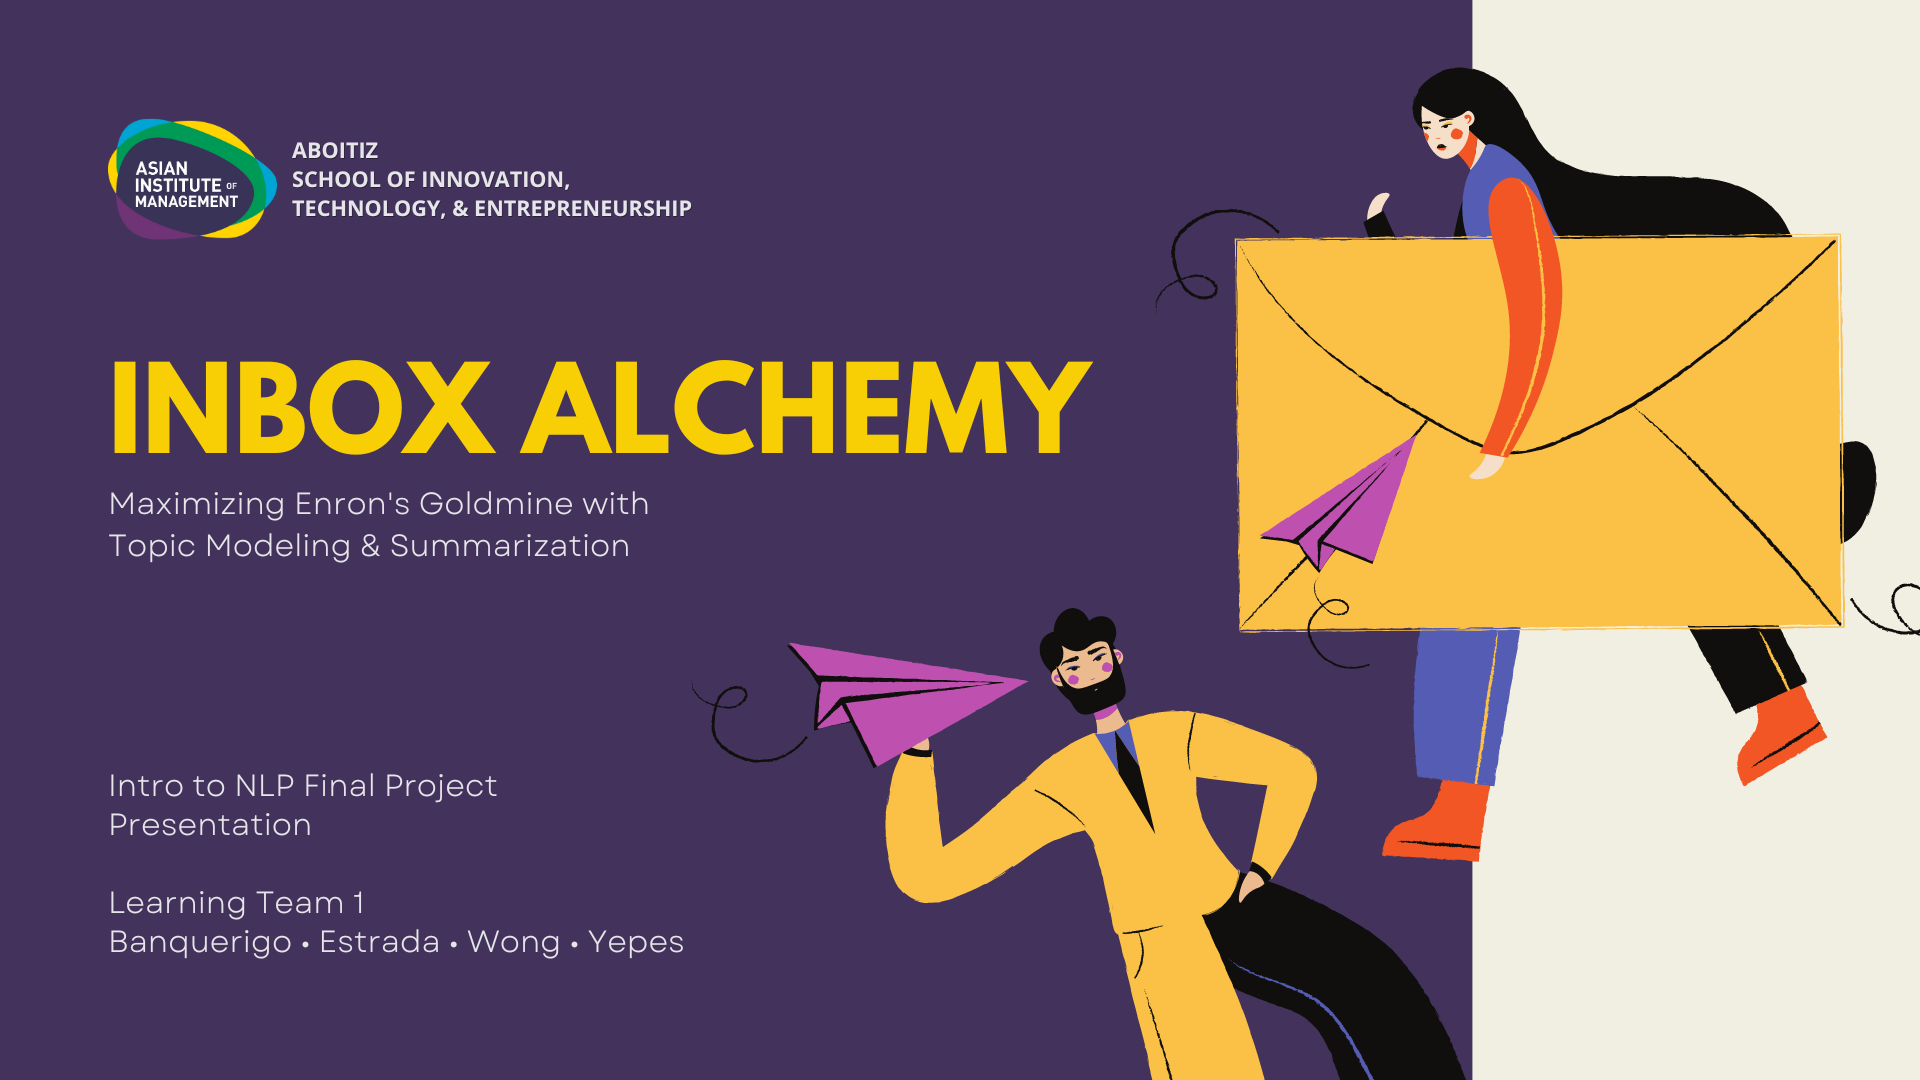

In [2]:
import pandas as pd
import numpy as np
import re
import os

import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

import email

import gensim
from gensim.utils import simple_preprocess

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# os.environ['XDG_CACHE_HOME'] = '/home/msds2023/byepes/.cache' 

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">I. Executive Summary</h1>

In today's digital age, individuals and organizations face the challenge of efficiently managing and extracting relevant information from a flood of emails. This has led to reduced productivity, delayed decision-making, and information overload. To address this issue, we embarked on a project to leverage natural language processing techniques and unlock the hidden value within the Enron Email Dataset.

The problem we aimed to solve was how to streamline the perusal of unread emails by using advanced natural language processing techniques. We sought to identify email topics and extract key information from the vast Enron Email Dataset to improve productivity and decision-making.

The motivation behind our project stemmed from the need to overcome the challenges posed by overwhelming email volumes. By developing a solution that could effectively navigate and extract insights from this vast dataset, we aimed to empower individuals and organizations to efficiently process their inboxes, reduce information overload, and enhance productivity.

Our primary data source was the Enron Email Dataset, a comprehensive collection of emails and related documents from the collapsed energy company, Enron Corporation. We performed data preparation, applied topic modeling techniques, and utilized text summarization methods to extract meaningful insights from the dataset. Our approach involved cleaning the data, filtering relevant emails, and implementing techniques such as Latent Dirichlet Allocation (LDA) and text summarization to identify topics and generate concise summaries.

Through our analysis, we successfully identified email topics and generated summaries that captured the essence of each topic. By applying filters and preprocessing steps, we refined the dataset to focus on the most relevant emails. We compared different summarization models and highlighted their strengths and limitations, providing valuable insights into the performance of these techniques in the context of email summarization.

Our project demonstrated the effectiveness of natural language processing techniques in addressing the challenges associated with managing and extracting insights from large email datasets. By leveraging topic modeling and text summarization, we enabled users to streamline their email perusal process, make informed decisions, and alleviate information overload. The Enron Email Dataset served as a valuable resource for our research, offering a rich collection of emails and related documents for analysis.

Future work could involve further refining the summarization models and exploring additional techniques to enhance the accuracy and usability of the solution. Overall, our project contributes to advancing the field of natural language processing and provides practical solutions for individuals and organizations dealing with email management challenges.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">II. Problem Statement</h1>

This study aims to explore the application of natural language processing techniques to identify email topics and streamline the process of perusing unread emails. Specifically, we seek to answer the following questions:

***How might we leverage natural language processing techniques to identify email topics and streamline the perusal of unread emails, enabling individuals and organizations to efficiently manage their inboxes and overcome the challenges of reduced productivity, delayed decision-making, and information overload?***

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">III. Motivation</h1>

The increasing volume of emails being sent and received by individuals and organizations has led to a significant challenge in efficiently managing and extracting relevant information from overflowing inboxes. The overwhelming influx of emails often leads to reduced productivity, delayed decision-making, and information overload. Traditional methods of manually sorting through and analyzing emails prove to be time-consuming and inefficient, necessitating the development of innovative approaches to address this problem.

To tackle this challenge, we propose utilizing natural language processing techniques to identify email topics and streamline the process of perusing unread emails. By applying topic modeling and text summarization algorithms, we aim to transform the task of email management from a burdensome ordeal into a streamlined and productive process. This approach has the potential to significantly enhance productivity, improve decision-making timelines, and alleviate the negative impact of information overload.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">IV. Data Source</h1>

<span style="color:#f26419; font-size:18px"><i>Dataset Overview</i></span>

The Enron Email Dataset is a highly regarded collection of emails exchanged among Enron Corporation employees, offering a valuable resource for analyzing email communication patterns, studying organizational behavior, and developing innovative email management solutions. It is a comprehensive collection of emails and documents that became publicly accessible following the bankruptcy of Enron Corporation, a prominent American energy company, in 2001. With its extensive scale, diversity, and real-world relevance, this dataset has become a pivotal asset for researchers, data scientists, and professionals in the field.

Comprising approximately 500,000 emails sent over a span of four years by approximately 150 Enron employees, the dataset covers a wide range of email types, including business communication, personal conversations, internal company discussions, and more. This diversity provides an authentic representation of email interactions within a corporate environment and facilitates comprehensive analysis of various email use cases.

</br>

<span style="color:#f26419; font-size:18px"><i>Key Characteristics of the Dataset</i></span>

1. **Large scale:** The dataset comprises a substantial volume of emails, allowing for extensive exploration and analysis.

2. **Real-world data:** The emails are authentic and reflect the actual communication patterns within the Enron Corporation, offering valuable insights into organizational dynamics.

3. **Multimodal content:** The dataset includes text-based emails as well as attachments such as documents, spreadsheets, and presentations, enabling a comprehensive understanding of email content.

4. **Email metadata:** Along with the email content, the dataset provides metadata such as sender, recipient, timestamp, and subject, facilitating contextual analysis and organization.

</br>

<span style="color:#f26419; font-size:18px"><i>Accessing the Dataset</i></span>

To access the Enron Email Dataset, it can be obtained from various sources, including public repositories and research archives. One prominent source is the Carnegie Mellon University (CMU) Enron Email Dataset, which provides a cleaned and anonymized version of the original dataset, making it suitable for research and analysis. The CMU Enron Email Dataset can be accessed through the following link:

- Kaggle: https://www.kaggle.com/datasets/wcukierski/enron-email-dataset
- Original Source: https://www.cs.cmu.edu/~./enron/

</br>

<span style="color:#f26419; font-size:18px"><i>The Raw Data</i></span>
    
|<center>Variable Name</center>|<center>Data type</center>|<center>Description</center>
|:-------------|:-------|:---|
|file          |string  |Represents the file path or name of each email in the dataset. It provides information about the location or identifier of the email file within the Enron Email Dataset. Each unique value in this column corresponds to an individual email.
|message       |string  |Contains the content of each email. It includes the full text of the email, including the email body, sender information, recipient information, timestamp, subject line, and any other metadata associated with the email.

<span style="font-size: 14px">
    <center><b>Table 1. Enron Email Raw Data Description</b></center>
</span>

</br>

<span style="color:#f26419; font-size:18px"><i>The Preprocessed Data</i></span>
    
|<center>Variable Name</center>|<center>Data type</center>|<center>Description</center>
|:------------------|:-------|:---|
|file               |string  |Represents the file path or name of each email in the dataset. It provides information about the location or identifier of the email file within the Enron Email Dataset. Each unique value in this column corresponds to an individual email.
|message            |string  |Contains the content of each email. It includes the full text of the email, including the email body, sender information, recipient information, timestamp, subject line, and any other metadata associated with the email.
|Date               |string  |Represents the date of the email. It provides information about when the email was sent or received.
|Subject            |string  |Contains the subject line of the email. It provides a brief summary or description of the email's content.
|X-From             |string  |Represents the sender of the email. It provides information about the individual or entity who sent the email.
|X-To               |string  |Contains the recipients of the email. It provides information about the individuals or entities who received the email.
|X-Folder           |string  |Represents the folder or directory path of the email within the Enron email system. It provides information about the email's location or categorization within the system.
|body               |string  |Contains the main body of the email. It includes the content of the email's message, which may include text, attachments, or other multimedia elements.
|body_token_len     |string  |Represents the length or number of tokens in the body of the email. It provides quantitative information about the size or complexity of the email's content.
|body_text_processed|string  |Contains the processed version of the email's body text. It may involve preprocessing steps such as tokenization, removing stopwords, or stemming, aimed at enhancing the text for further analysis or modeling.

<span style="font-size: 14px">
    <center><b>Table 2. Enron Email Preprocessed Data Description</b></center>
</span>


<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">V. Assumptions & Design Constraints</h1>

<span style="color:#f26419; font-size:18px">The Assumptions</span>

1. **Email Integrity:** It is assumed that the Enron Email Dataset maintains the integrity of the original email content, including the body, subject, sender, and recipient information. Any modifications or discrepancies in the dataset could potentially impact the analysis and results.

2. **Dataset Completeness:** It is assumed that the provided dataset is a representative sample of the Enron email corpus and encompasses a significant portion of the overall email communication within the organization. However, it is acknowledged that the dataset may not include all emails exchanged by Enron employees during the specified time period.

3. **Preprocessing Quality:** It is assumed that any preprocessing applied to the dataset, such as text processing, tokenization, or cleaning, has been performed accurately and does not introduce significant errors or biases that could affect subsequent analysis or modeling.

4. **Email Categorization:** It is assumed that the Enron Email Dataset does not include pre-assigned topic or category labels for emails. Therefore, any categorization or topic modeling efforts will rely solely on the textual content and metadata provided in the dataset.

</br>

<span style="color:#f26419; font-size:18px">The Design Constraints</span>

1. **Computational Resources:** The design and implementation of natural language processing techniques for email topic identification and summarization should consider the computational resources available. Processing a large volume of emails and implementing complex algorithms may require significant computational power and memory.

2. **Time Constraints:** The efficiency of the proposed solution is an important consideration. Processing large volumes of emails and generating topic models and summaries in a timely manner is crucial for practical email management and decision-making. Real-time or near-real-time performance may be a design constraint for certain applications.

3. **Scalability:** The solution design should be scalable to handle growing email volumes and accommodate potential expansion to larger datasets in the future. Considerations should be given to the efficiency and scalability of algorithms, storage requirements, and processing capabilities.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">VI. Methodology</h1>

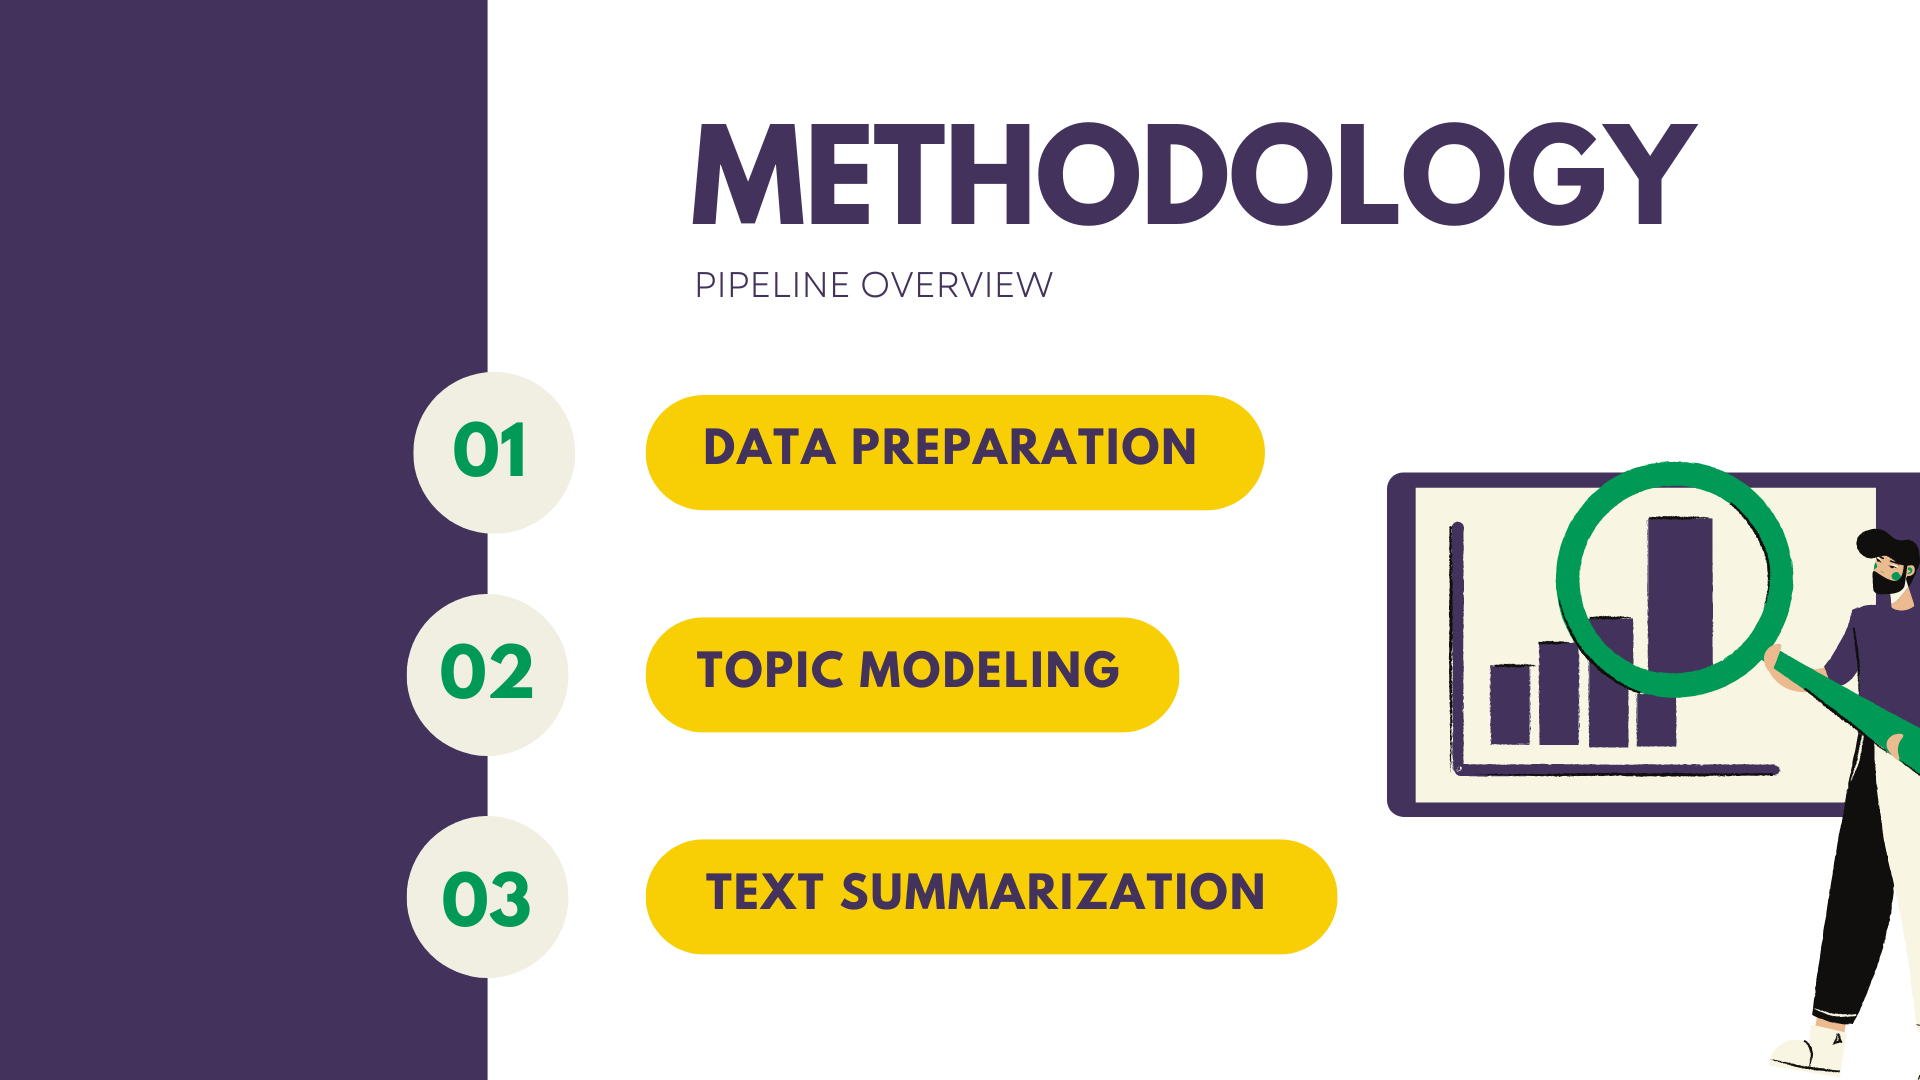

Our methodology involved several key steps to tackle the challenge of efficiently navigating and extracting relevant information from the Enron Email Dataset.

1. **`Data Preparation:`** We began by loading and examining the raw data, which consisted of approximately 500,000 emails and related documents. We identified the relevant columns, such as date, subject, sender, recipient, and email body, and extracted them into a structured format. We also performed data cleaning to remove any unnecessary characters, HTML tags, or special symbols that could affect the analysis.

2. **`Topic Modeling:`** To identify email topics, we employed Latent Dirichlet Allocation (LDA), a popular topic modeling technique. LDA helps uncover hidden themes or topics within a collection of documents. We applied LDA to the preprocessed email data and determined the optimal number of topics based on coherence scores and mean stabilities. This allowed us to gain insights into the major themes and subjects present in the Enron emails.

3. **`Text Summarization:`** In addition to topic modeling, we utilized text summarization techniques to generate concise summaries of the emails. We explored different approaches, including BART and Pegasus models, which leverage transformer-based architectures for abstractive summarization. These models were trained on large-scale datasets and were capable of capturing the essence of the emails and condensing the information into shorter, more digestible summaries.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">VII. Data Exploration</h1>

<h2 style="color:#003b7f">Raw Data</h2>

<span style="color:#f26419; font-size:18px"><i>Loading the Enron Dataset</i></span>

In [8]:
df = pd.read_csv('archive.zip')
df.head(5)

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


<span style="color:#f26419; font-size:18px"><i>The Raw Data Shape</i></span>

Next, let's examine the shape of the raw data. We can observe that the dataset consists of 517,401 data points and is structured with only 2 columns.

In [11]:
shape_data = {
    'Attribute': ['Number of Rows', 'Number of Columns'],
    'Value': [df.shape[0], df.shape[1]]
}

shape_df = pd.DataFrame(shape_data)

display(shape_df)

,Attribute,Value
0,Number of Rows,517401
1,Number of Columns,2


<span style="color:#f26419; font-size:18px"><i>The Raw Data Null Counts</i></span>

Next, let's check for any null values in each column of the raw data. Fortunately, the Enron dataset does not contain any null values, ensuring the completeness and integrity of the data.

In [13]:
missing_values = df.isna().sum()
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
display(missing_values_df)

,Column,Missing Values
0,file,0
1,message,0


<span style="color:#f26419; font-size:18px"><i>The Raw Data Statistics</i></span>

Next, let's perform a quick statistical analysis on the raw data using the `.describe()` method. This will provide us with key summary statistics for each column in the dataset.

In [14]:
df.describe()

,file,message
count,517401,517401
unique,517401,517401
top,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
freq,1,1


<h2 style="color:#003b7f">Data Preprocessing</h2>

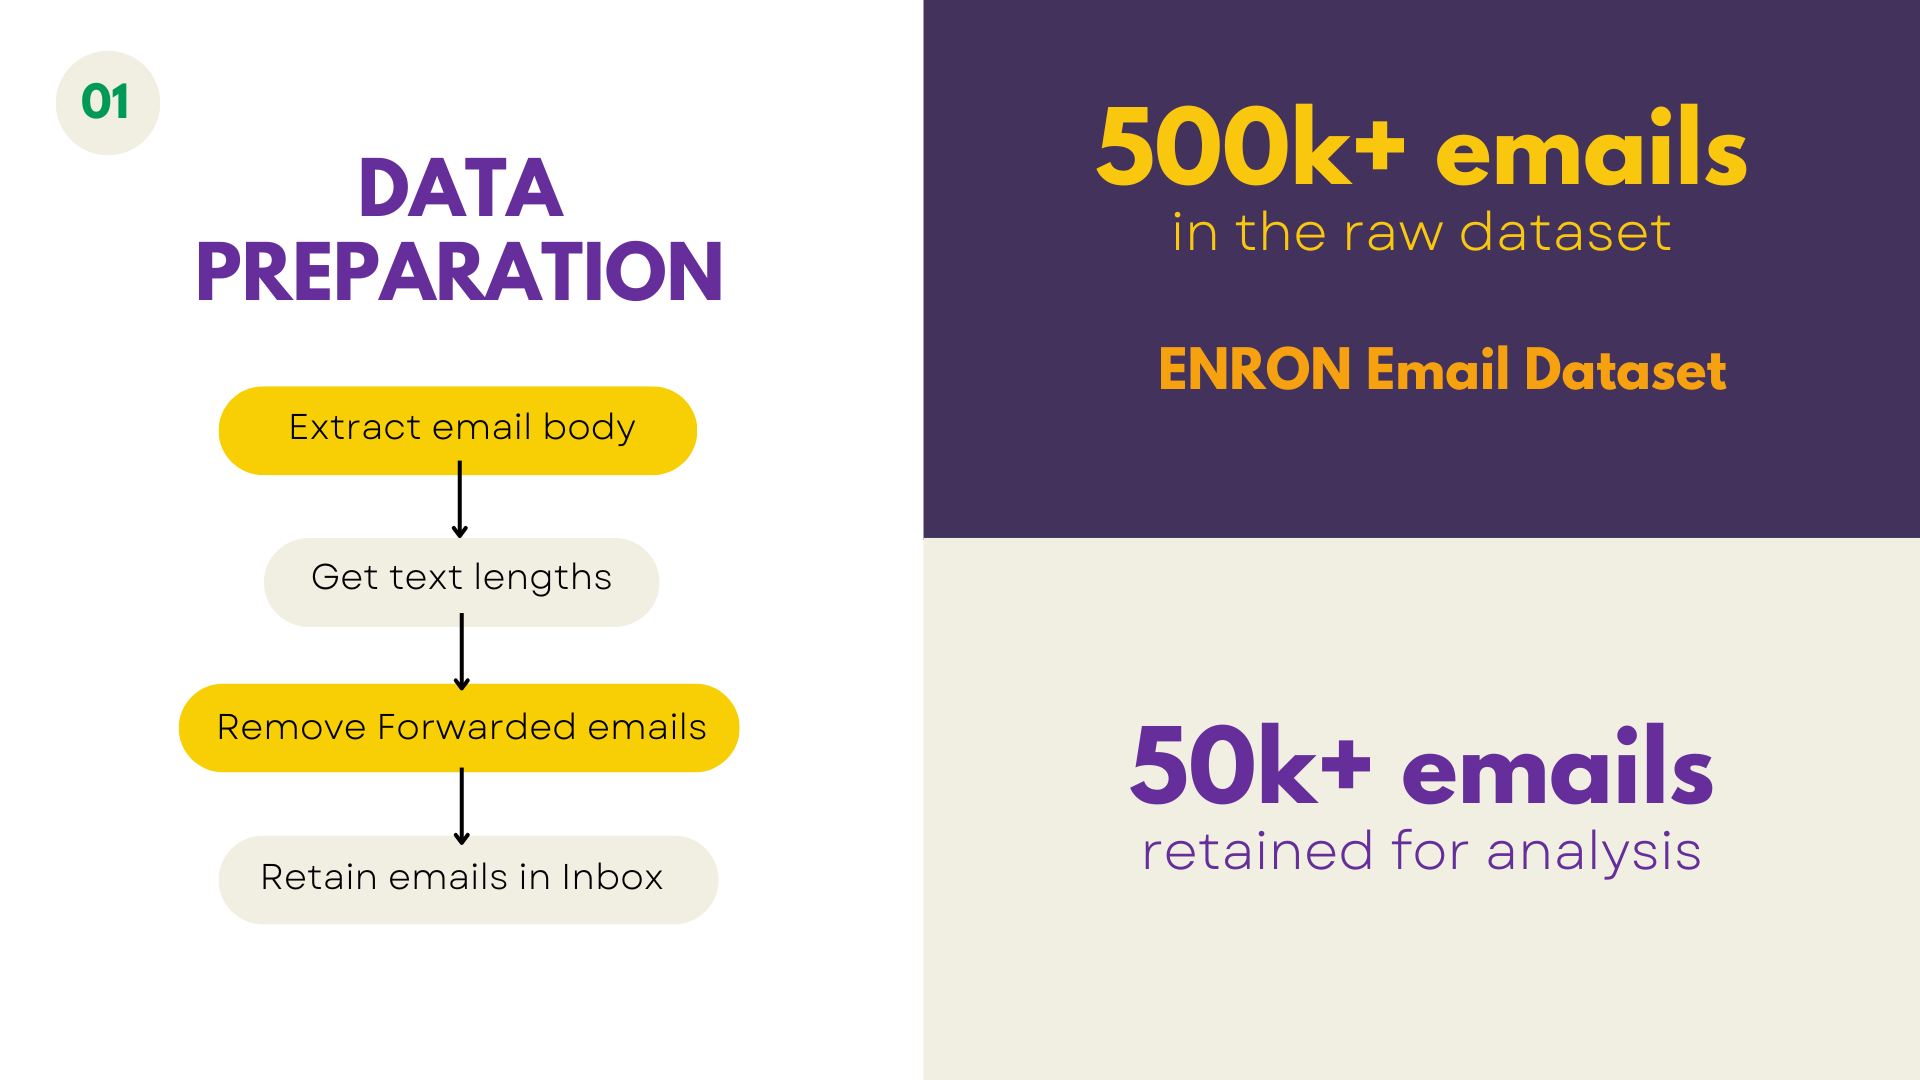

<span style="color:#f26419; font-size:18px"><i>Data Extraction</i></span>

Our first goal is to transform our raw data to facilitate feature extraction. To achieve this, we define a function called `extract_data`, which accepts two parameters: `feature` and `df`. This function will be responsible for extracting the specified feature from each email message and returning a list containing those extracted values.

In [6]:
def extract_data(feature, df):
    column= []
    for row in df:
        e = email.message_from_string(row)
        column.append(e.get(feature))
    return column    

In [9]:
df['Date'] = extract_data("Date",df['message'])
df['Subject'] = extract_data("Subject",df['message'])
df['X-From'] = extract_data("X-From",df['message'])
df['X-To'] = extract_data("X-To",df['message'])
df['X-Folder'] = extract_data("X-Folder",df['message'])

After extracting details from the message columns using our function, we obtained the following information:

1. **`Date:`** Represents the date when the email was sent or received. It provides temporal information about the timing of the communication.

2. **`Subject:`** Contains the subject line of the email. It serves as a concise summary or description of the email's content.

3. **`X-From:`** Represents the sender of the email. It provides information about the individual or entity who initiated the communication.

4. **`X-To:`** Contains the recipients of the email. It provides information about the individuals or entities to whom the email was addressed.

5. **`X-Folder:`** Represents the folder or directory path of the email within the Enron email system. It indicates the location or categorization of the email within the organizational structure.

Each of these extracted details from the message columns provides valuable information about the email's metadata, including temporal aspects, sender and recipient information, and the organizational context within which the email exists.

In [10]:
df.head(5)

,file,message,Date,Subject,X-From,X-To,X-Folder
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se..."
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se..."
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,Phillip K Allen,Leah Van Arsdall,\Phillip_Allen_Dec2000\Notes Folders\'sent mail
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,Phillip K Allen,Randall L Gay,\Phillip_Allen_Dec2000\Notes Folders\'sent mail
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,Phillip K Allen,Greg Piper,\Phillip_Allen_Dec2000\Notes Folders\'sent mail


To focus exclusively on generating insights from the email body, we require a function that extracts both the `email body` itself and the corresponding `token lengths` from the email messages.

In [13]:
def get_email_body(data):
    column = []
    col_len = []
    for msg in data:
        e = email.message_from_string(msg)
        column.append(e.get_payload())
        col_len.append(len(e.get_payload().split()))
    return column, col_len

In [11]:
df['body'], df['body_token_len'] = get_email_body(df['message'])

To enrich our data, we have added two additional columns:

1. **`body:`** This column contains the content of the email body. It includes the main message or text of the email, providing detailed information, discussions, or instructions conveyed within the communication.

2. **`body_token_len`:** This column quantifies the length or complexity of the email body by measuring the number of tokens. Tokens are the individual units of text, such as words or characters, separated by spaces or delimiters.

In [12]:
df.head(5)

,file,message,Date,Subject,X-From,X-To,X-Folder,body,body_token_len
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Here is our forecast\n\n,4
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Traveling to have a business meeting takes the...,139
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,Phillip K Allen,Leah Van Arsdall,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,test successful. way to go!!!,5
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,Phillip K Allen,Randall L Gay,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,"Randy,\n\n Can you send me a schedule of the s...",34
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,Phillip K Allen,Greg Piper,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Let's shoot for Tuesday at 11:45.,6


<div class="alert alert-info">

### Checkpoint # 1

As a precautionary measure, prior to advancing to the next steps, we will save the processed data and establish a `checkpoint`. This ensures data preservation, enables reproducible analysis, and facilitates efficient error handling, providing easy access to the data and effective debugging in subsequent stages.

</div>

In [4]:
df.to_csv('processed_emails.csv', index=False, mode='w')

<span style="color:#f26419; font-size:18px"><i>Data Filtering</i></span>

Next, we reload the processed data.

In [5]:
df = pd.read_csv('processed_emails.csv')

Upon examining the shape of the dataset, we discovered that we possess approximately 500,000 datapoints at our disposal, providing a substantial amount of data for analysis and processing.

In [22]:
shape_data = {
    'Attribute': ['Number of Rows', 'Number of Columns'],
    'Value': [df.shape[0], df.shape[1]]
}

shape_df = pd.DataFrame(shape_data)

display(shape_df)

,Attribute,Value
0,Number of Rows,517401
1,Number of Columns,9


However, considering the entire dataset of 500,000 data points may not be practical or relevant for our specific use case. Therefore, we have implemented a filtration process to refine the dataset based on specific criteria. The following steps were taken:

1. Excluding emails containing the keywords 'Forwarded' or 'Original Message' in the body: This step eliminates redundant or secondary content often found in forwarded emails. By excluding such emails, we focus on the primary and original messages.

2. Excluding emails with 'Re:' or 'Fw:' in the subject (case-insensitive): This filter helps to remove emails that are responses or forwarded messages. By excluding these emails, we retain the original messages and filter out any subsequent replies or forwarded content.

3. Including only emails found in the 'Inbox' folder (case-insensitive): This filter ensures that only emails received directly and stored in the 'Inbox' folder are included in our refined dataset. This prioritizes original messages and excludes emails that might be in other folders or subfolders.

In [8]:
df = (df[(~df['body'].str.contains('Forwarded')) &
        (~df['body'].str.contains('Original Message')) &
        (~df['Subject'].fillna('').str.contains('Re:|Fw:', case=False)) &
        (df['X-Folder'].str.contains('Inbox', case=False))])

After applying the necessary filters to refine the dataset, we were left with a more focused subset of data. The resulting dataset has a shape of (54,231, 9), indicating that we now have 54,231 data points and 9 columns available for our analysis.

In [23]:
shape_data = {
    'Attribute': ['Number of Rows', 'Number of Columns'],
    'Value': [df.shape[0], df.shape[1]]
}

shape_df = pd.DataFrame(shape_data)

display(shape_df)

,Attribute,Value
0,Number of Rows,54231
1,Number of Columns,9


In [10]:
df.head(5)

,file,message,Date,Subject,X-From,X-To,X-Folder,body,body_token_len
2006,allen-p/inbox/10.,Message-ID: <14955894.1075855377681.JavaMail.e...,"Sun, 30 Dec 2001 22:49:42 -0800 (PST)",ANCHORDESK: Hope ahead: What I learned from 20...,"""AnchorDesk"" <AnchorDesk_Daily@anchordesk.zdli...",pallen@ENRON.COM,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",\n\n_____________________DAVID COURSEY________...,459
2007,allen-p/inbox/11.,Message-ID: <7462038.1075855377703.JavaMail.ev...,"Sun, 30 Dec 2001 23:42:30 -0800 (PST)","NGI Publications - Monday, December 31st 2001",subscriptions@intelligencepress.com@ENRON,pallen@enron.com,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox","Dear phillip,\n\n\nThis e-mail is automated no...",125
2008,allen-p/inbox/12.,Message-ID: <21572157.1075855377726.JavaMail.e...,"Mon, 31 Dec 2001 02:24:51 -0800 (PST)","Click. Spin. Chances to Win up to $10,000!",Prize Machine<PrizeMachine@feedback.iwon.com>@...,pallen@enron.com,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox","\n[IMAGE] [IMAGE] [IMAGE] [IMAGE] $ 2,500 ...",162
2009,allen-p/inbox/13.,Message-ID: <7618763.1075855377753.JavaMail.ev...,"Mon, 31 Dec 2001 10:53:43 -0800 (PST)",NETCO,"Kitchen, Louise </O=ENRON/OU=NA/CN=RECIPIENTS/...","Colwell, Wes </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",The New Year has arrived and we really to fina...,380
2010,allen-p/inbox/14.,Message-ID: <4845954.1075855377776.JavaMail.ev...,"Mon, 31 Dec 2001 17:18:31 -0800 (PST)",Your Approval is Overdue: Access Request for m...,ARSystem <ARSystem@mailman.enron.com>@ENRON,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",This request has been pending your approval fo...,50


<span style="color:#f26419; font-size:18px"><i>Data Cleaning</i></span>

Next, let's proceed with the data cleaning process. In this step, we will create a new variable called `df_process` and make a copy of the original DataFrame `df`. This allows us to perform data cleaning operations on the new variable while preserving the integrity of the original dataset.

In [11]:
df_process = df.copy()
df_process[['body']].head(5)

,body
2006,\n\n_____________________DAVID COURSEY________...
2007,"Dear phillip,\n\n\nThis e-mail is automated no..."
2008,"\n[IMAGE] [IMAGE] [IMAGE] [IMAGE] $ 2,500 ..."
2009,The New Year has arrived and we really to fina...
2010,This request has been pending your approval fo...


Next, in the cleaning process, we performed the following operations on the `df_process` DataFrame:

1. **`Removing punctuation from the 'subject', 'to', 'cc', and 'bcc' fields:`** We utilized regular expressions to identify and remove the punctuation from these fields. The regex pattern `\n[Tt][Oo]:[^\n]|\n[CC][cc]:[^\n]|\n[Bb][Cc][Cc]:[^\n]|\n[Ss]ubject:[^\n]` was applied to the 'body' column, and the matching patterns were replaced with an empty string. This step helps eliminate unnecessary punctuation and metadata from the email bodies.

2. **`Converting the email body text to lowercase:`** We used a lambda function and the `lower()` method to convert the text in the 'body' column to lowercase. Additionally, we applied the regex pattern '[^\w \n]' to remove any non-alphanumeric characters and retain only words, spaces, and newlines in the processed text. This standardization step helps in achieving consistent text representations and simplifies subsequent text analysis tasks.

By implementing these cleaning steps, we aimed to enhance the quality and consistency of the text data, removing extraneous information and preparing it for further analysis and processing.

In [12]:
# Load the regular expression library

# Remove punctuation subject, to, cc, bcc
regex = "\n[Tt][Oo]:[^\n]*|\n[CC][cc]:[^\n]*|\n[Bb][Cc][Cc]:[^\n]*|\n[Ss]ubject:[^\n]*"
df_process['body'] = df_process['body'].apply(lambda x: re.sub(regex, '', x))

# Convert the titles to lowercase
df_process['body_text_processed'] = df_process['body'].apply(lambda x: re.sub('[^\w \n]', '', x.lower()))

In [21]:
df_process.head(5)

,file,message,Date,Subject,X-From,X-To,X-Folder,body,body_token_len,body_text_processed
2006,allen-p/inbox/10.,Message-ID: <14955894.1075855377681.JavaMail.e...,"Sun, 30 Dec 2001 22:49:42 -0800 (PST)",ANCHORDESK: Hope ahead: What I learned from 20...,"""AnchorDesk"" <AnchorDesk_Daily@anchordesk.zdli...",pallen@ENRON.COM,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",\n\n_____________________DAVID COURSEY________...,459,\n\n_____________________david coursey________...
2007,allen-p/inbox/11.,Message-ID: <7462038.1075855377703.JavaMail.ev...,"Sun, 30 Dec 2001 23:42:30 -0800 (PST)","NGI Publications - Monday, December 31st 2001",subscriptions@intelligencepress.com@ENRON,pallen@enron.com,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox","Dear phillip,\n\n\nThis e-mail is automated no...",125,dear phillip\n\n\nthis email is automated noti...
2008,allen-p/inbox/12.,Message-ID: <21572157.1075855377726.JavaMail.e...,"Mon, 31 Dec 2001 02:24:51 -0800 (PST)","Click. Spin. Chances to Win up to $10,000!",Prize Machine<PrizeMachine@feedback.iwon.com>@...,pallen@enron.com,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox","\n[IMAGE] [IMAGE] [IMAGE] [IMAGE] $ 2,500 ...",162,\nimage image image image 2500 image im...
2009,allen-p/inbox/13.,Message-ID: <7618763.1075855377753.JavaMail.ev...,"Mon, 31 Dec 2001 10:53:43 -0800 (PST)",NETCO,"Kitchen, Louise </O=ENRON/OU=NA/CN=RECIPIENTS/...","Colwell, Wes </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",The New Year has arrived and we really to fina...,380,the new year has arrived and we really to fina...
2010,allen-p/inbox/14.,Message-ID: <4845954.1075855377776.JavaMail.ev...,"Mon, 31 Dec 2001 17:18:31 -0800 (PST)",Your Approval is Overdue: Access Request for m...,ARSystem <ARSystem@mailman.enron.com>@ENRON,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",This request has been pending your approval fo...,50,this request has been pending your approval fo...


<div class="alert alert-info">

### Checkpoint # 2

As a precautionary measure, prior to advancing to the next steps, we will save the processed data and establish a `checkpoint`. This ensures data preservation, enables reproducible analysis, and facilitates efficient error handling, providing easy access to the data and effective debugging in subsequent stages.

</div>

In [22]:
df_process.to_csv('cleaned_processed_emails.csv', index=False, mode='w')

<span style="color:#f26419; font-size:18px"><i>The Preprocessed Data Shape</i></span>

After saving the preprocessed data, we can examine its shape to understand the dimensions of the cleaned dataset. 

In [16]:
shape_data = {
    'Attribute': ['Number of Rows', 'Number of Columns'],
    'Value': [df_process.shape[0], df_process.shape[1]]
}

shape_df = pd.DataFrame(shape_data)

display(shape_df)

,Attribute,Value
0,Number of Rows,54231
1,Number of Columns,10


<span style="color:#f26419; font-size:18px"><i>The Preprocessed Data Null Counts</i></span>

Next, let's examine the null counts in the preprocessed data to ensure its quality for performing Latent Dirichlet Allocation (LDA) and text summarization. It is crucial to have a dataset with minimal or no missing values to obtain accurate and reliable results from these techniques.

In [24]:
missing_values = df_process.isna().sum()
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
display(missing_values_df)

,Column,Missing Values
0,file,0
1,message,0
2,Date,0
3,Subject,1359
4,X-From,0
5,X-To,977
6,X-Folder,0
7,body,0
8,body_token_len,0
9,body_text_processed,1


<span style="color:#f26419; font-size:18px"><i>The Preprocessed Data Statistics</i></span>

Next, let's take a quick look at the statistical summary of the preprocessed data. This will provide us with key summary statistics for each column in the dataset, giving us insights into the distribution and characteristics of the processed data.

In [25]:
df_process.describe()

,body_token_len
count,54231.000000
mean,335.144917
std,1340.573926
min,1.000000
25%,44.000000
50%,100.000000
75%,233.000000
max,64024.000000


In [16]:
# # Import the wordcloud library
# from wordcloud import WordCloud

# # Join the different processed titles together.
# long_string = ','.join(list(df_process['body_text_processed'].values))

# # Create a WordCloud object
# wordcloud = WordCloud(background_color="white",
#                       max_words=5000,
#                       contour_width=3,
#                       contour_color='steelblue')

# # Generate a word cloud
# wordcloud.generate(long_string)

# # Visualize the word cloud
# wordcloud.to_image()

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">VIII. Solution Implementation</h1>

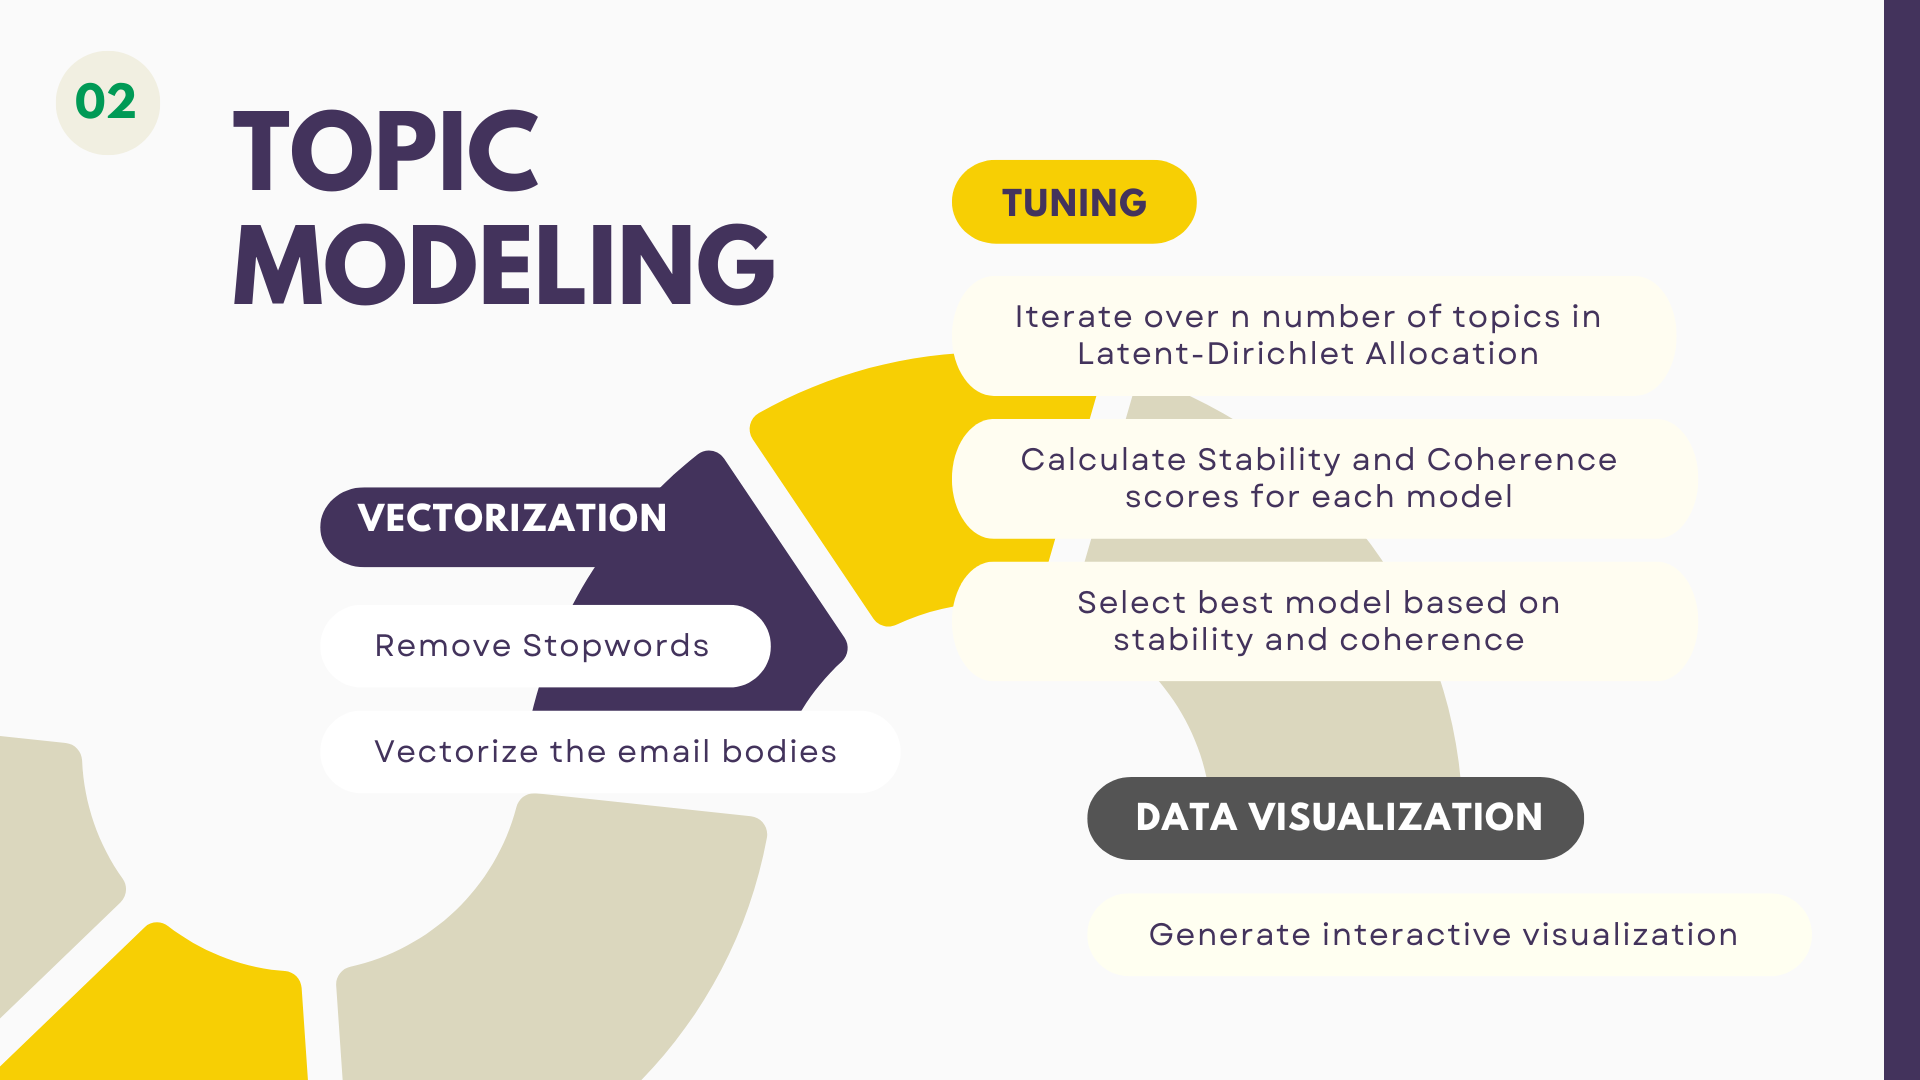

For our solution implementation, we will be utilizing two techniques: Latent Dirichlet Allocation (LDA) and Text Summarization, to extract meaningful insights and improve the efficiency of navigating and extracting relevant information from the Enron Email Dataset.

**Latent Dirichlet Allocation (LDA)**

- LDA is a widely used topic modeling technique that helps identify underlying topics or themes within a collection of documents. By applying LDA to our dataset, we aim to uncover latent topics that are present in the emails [1-2]. This technique will allow us to discover the main subjects, recurring themes, or categories of discussion within the Enron emails, providing a high-level overview and organizing the dataset based on the identified topics. This will help users efficiently navigate and explore the emails based on their specific interests or topics of concern.

**Text Summarization**

- Text summarization is the process of generating concise and coherent summaries from a given text. In the context of our solution, we will apply text summarization techniques to the body of the emails to automatically generate brief summaries that capture the essential information and key points of each email [3]. This will help users quickly grasp the main content and intent of the emails without having to read through the entire text. Text summarization will significantly reduce the time and effort required for perusing unread emails, enabling users to prioritize and focus on the most critical or relevant messages.

By incorporating LDA and Text Summarization techniques into our solution, we aim to streamline the perusal of unread emails, enhance productivity, and facilitate efficient decision-making by providing users with a clear understanding of the email topics and succinct summaries of their content.

<h2 style="color:#003b7f">LDA with gensim</h2>

For the LDA implementation, we will leverage a powerful and widely-used library called Gensim [4]. Gensim is a Python library specifically designed for topic modeling and document similarity analysis. It provides an easy-to-use interface and efficient algorithms for building and training LDA models on large corpora of text data.

Again, we reload the processed data.

In [15]:
df_process = pd.read_csv('cleaned_processed_emails.csv')

To prepare the text data for LDA analysis, we utilize this code snippet, which includes:

1. defining a list of stopwords
2. implementing functions to preprocess the sentences by removing stopwords
3. converting the processed data into a list of words
4. and finally removing the stopwords from the text data.

The resulting `data_words` variable contains the preprocessed words without stopwords, which can be further analyzed.

In [4]:
stop_words = list(STOP_WORDS)
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'cc', 'email', 'bcc', 'subject'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df_process.body_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:2][1][:30])

['dear', 'phillip', 'automated', 'notification', 'availability', 'current', 'natural', 'gas', 'intelligence', 'newsletters', 'username', 'pallen', 'password', 'access', 'ngis', 'daily', 'gas', 'price', 'index', 'ngis', 'weekly', 'gas', 'price', 'index', 'natural', 'gas', 'intelligence', 'weekly', 'newsletter', 'forgotten']


To facilitate Latent Dirichlet Allocation (LDA) analysis, we employs the gensim library to:

1. create a dictionary, id2word, from the preprocessed data_words list
2. constructs a corpus, texts, using the same preprocessed data,
3. and generate a term document frequency representation, `corpus`, by applying the doc2bow function to each document in the corpus. 

The printed output demonstrates the term document frequency representation for the third document, showing the term IDs and their respective frequencies.

In [5]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[2][:30])

[(21, 1), (50, 1), (116, 1), (131, 1), (165, 1), (174, 1), (180, 1), (189, 1), (206, 1), (207, 1), (208, 2), (225, 1), (226, 1), (227, 1), (228, 1), (229, 5), (230, 2), (231, 2), (232, 1), (233, 1), (234, 13), (235, 2), (236, 4), (237, 2), (238, 1), (239, 1), (240, 1), (241, 1), (242, 1), (243, 1)]


For the purpose of hyperparameter tuning in Latent Dirichlet Allocation (LDA), we implement a range of topic numbers, excluding the value 0, to iterate through.

We then utilize the gensim library to create LDA models for each topic number, specifying the corpus, dictionary, number of topics, chunk size, number of passes, random state, and iterations. We also print the iteration number, extract and store the shown topics for each model, and retrieve the top keywords associated with each topic.

This iterative process allows for exploration and comparison of LDA models with varying topic numbers to identify the optimal number of topics for the given dataset.

<span style="color:#f26419; font-size:18px"><i>Hyperparameter Tuning the LDA Model</i></span>

In [6]:
"""
    LDA hyperparameter tuning:
    https://stackoverflow.com/questions/32313062/what-is-the-best-way-to-obtain-the-optimal-number-of-topics-for-a-lda-model-usin
"""
num_topics = list(range(20)[1:])
num_keywords = 15

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    print(f'Iteration {i}')
    LDA_models[i] = gensim.models.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i,
                                           chunksize=len(corpus),
                                           passes=20,
                                           random_state=214,
                                           iterations=10)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

Next, we define a function `jaccard_similarity` that calculates the Jaccard similarity between two topics [5]. The Jaccard similarity is a statistical measure used to compare the `similarity` and `diversity` of sample sets. It is calculated as the ratio of the size of the intersection of the two sets to the size of their union.

The code takes two topics as input and converts them into sets. It then determines the intersection and union of these sets. Finally, it calculates and returns the Jaccard similarity as the ratio of the sizes of the intersection and the union.

The goal of using Jaccard similarity in this context is to assess the `degree of overlap` or `similarity` between two topics. By computing the Jaccard similarity, it provides a measure of how closely related or similar the two topics are based on the elements they share in common. *Lower Jaccard scores indicate greater coverage of diverse elements*, implying less overlap and more distinctiveness between the topics.

In [7]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

Next, we will evaluate the `stability` of the Latent Dirichlet Allocation (LDA) model by calculating the mean Jaccard similarity between topics across different numbers of topics [6]. It helps assess how consistent the topics are when the number of topics varies. By measuring the stability, it provides insights into the reliability and robustness of the LDA model's topic assignments, aiding in the selection of an optimal number of topics for the given dataset.

In [5]:
LDA_stability = {}

for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]
mean_stabilities

[0.5037593984962406,
 0.23745791245791245,
 0.2145035121328225,
 0.19302403985466862,
 0.1813720104087188,
 0.16356521245697897,
 0.13761197731242644,
 0.1384401676723347,
 0.12256914719807502,
 0.09953052955404053,
 0.09870528079269103,
 0.10156367151663338,
 0.09255886320938196,
 0.08388020901786852,
 0.08423354699116682,
 0.08290587481432722,
 0.08107955334227579,
 0.07215902937117204]

To make our model more robust, we also calculate the `coherence scores` for different numbers of topics in the LDA model using the c_v coherence metric.

`Coherence` measures the degree of semantic similarity between words within each topic, providing an evaluation of the interpretability and coherence of the topics generated by the LDA model. By computing the coherence scores across various numbers of topics, it helps identify the optimal number of topics that yield the most coherent and meaningful topic representations for the given corpus.

In [7]:
from gensim.models.coherencemodel import CoherenceModel
coherences = [CoherenceModel(model=LDA_models[i], texts=texts, dictionary=id2word, coherence='c_v').get_coherence()\
              for i in num_topics[:-1]]
coherences

[0.3378031730677032,
 0.3390421992428355,
 0.46455121863634163,
 0.4801221482889074,
 0.5500389522283868,
 0.5328000079384562,
 0.5446209563623189,
 0.6428481244122364,
 0.5925917781915004,
 0.6186385896193259,
 0.5823693974489021,
 0.6330339257914755,
 0.6280379577824757,
 0.5763706307688918,
 0.5679370899464579,
 0.5587277812004443,
 0.5551557970414717,
 0.588217031027717]

Afterwards, we need to calculates the differences between coherence scores and mean stabilities for each number of topics in the LDA modelfor us to select the number of topics with the `highest coherence-stability difference` as the ideal number of topics for the LDA model.

In [10]:
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs) #lower value means higher coherence since we used u_mass

coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

We then create a line plot to visualizes the average `topic overlap` and `topic coherence` metrics for different numbers of topics in the LDA model. 

We also marks the ideal number of topics determined based on the `coherence-stability difference`. 

The plot helps in assessing the relationship between the number of topics and these evaluation metrics, providing insights into the `optimal number of topics` for the LDA model.

In [13]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num-1, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 2, xmax=ideal_topic_num, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([-y_max, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()   

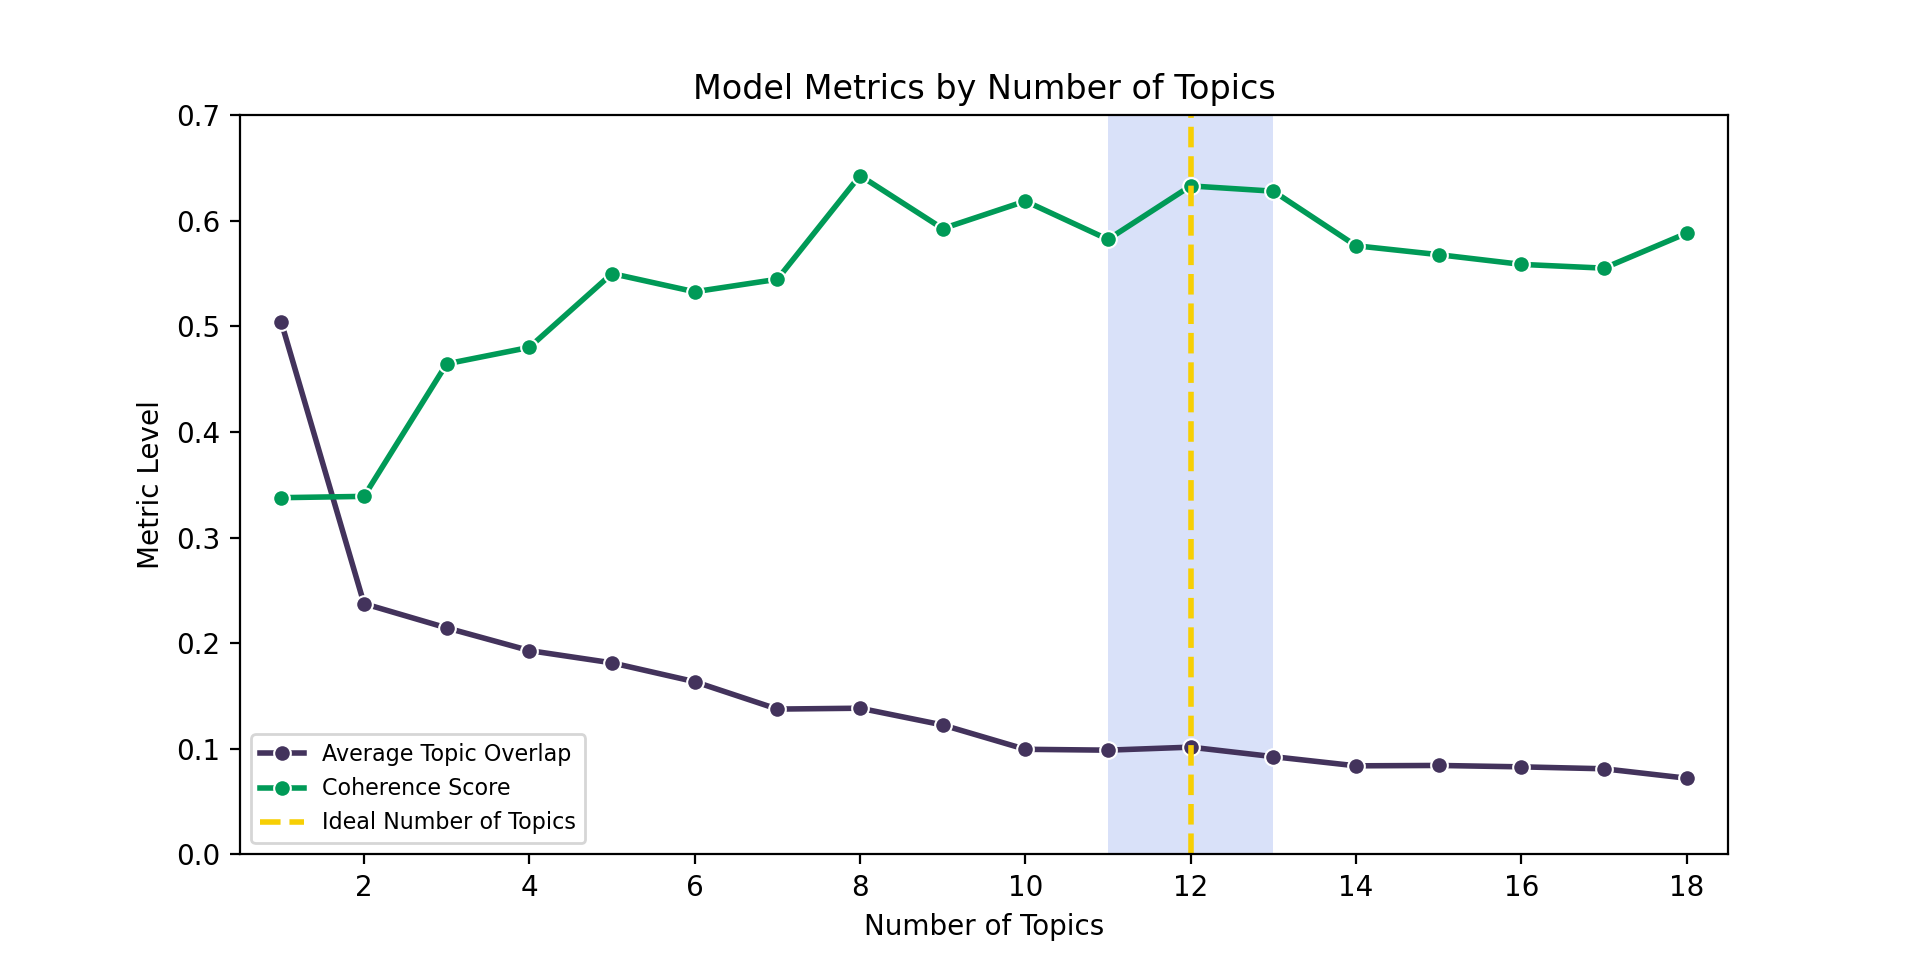

<span style="color:#f26419; font-size:18px"><i>Selecting the Best LDA Model</i></span>

Based on the analysis of coherence scores and mean stabilities, we have determined that **`12 topics`** provide the optimal balance of interpretability, coherence, and stability for our Enron Email Dataset. This number of topics allows us to capture a diverse range of themes and subjects within the emails, enabling efficient exploration and navigation of the dataset based on these identified topics.

<span style="color:#f26419; font-size:18px"><i>Topics from our Best LDA Model</i></span>

Based on the topics generated by the Best Latent Dirichlet Allocation (LDA) model, here are the interpretations:

**Topic 0: Power Outages**

- This topic seems to be related to scheduled power outages. It includes terms like "pm," "scheduled," "outages," and specific days of the week like "sat" (Saturday), "fri" (Friday), and "ct" (Central Time). It suggests discussions or notifications about planned power outages and their timing.

**Topic 1: Travel and Fares**

- This topic revolves around travel-related terms such as "travel," "tofrom" (referring to transportation between two locations), "tx" (Texas), "hotel," and "houston." It also includes terms like "fares" and "rates," indicating a possible discussion on travel fares and rates for accommodations.

**Topic 2: Enron and Financial Matters**

- This topic is related to the company Enron and financial terms. It includes terms like "enron," "company," "credit," "trading," "financial," "corp," and "gas." It suggests discussions or mentions of Enron's financial activities, trading, and credit-related matters.

**Topic 3: General Discussions and Questions**

- This topic includes terms like "know," "meeting," "time," "thanks," "new," and "questions." It seems to be a general topic involving discussions, inquiries, and exchanges of information.

**Topic 4: Information Access and Communication**

- This topic includes terms like "information," "click," "contact," "message," and "access." It suggests discussions or instructions regarding accessing information or communicating with someone.

**Topic 5: Database and Technical Errors**

- This topic is related to technical terms such as "error," "database," "occurred," "data," "attempting," "engine," and "initialize." It indicates discussions or issues related to database errors, troubleshooting, and technical problems.

**Topic 6: Miscellaneous Updates and Information**

- This topic includes terms like "size," "td," "width," "font," "updated," and "week." It appears to be a miscellaneous topic involving updates, information, and possibly formatting or design-related aspects.

**Topic 7: Schedules and Variances**

- This topic revolves around terms like "final," "schedule," "hour," "schedules," "detected," "variances," and other specific terms like "sc_id" and "trans_date." It suggests discussions or notifications related to schedules, timeframes, and detecting variances or discrepancies.

**Topic 8: Company News and Partnerships**

- This topic includes terms like "million," "company," "new," "services," "technology," "capital," "round," and "partners." It suggests discussions or news related to company updates, partnerships, investments, and funding rounds.

**Topic 9: Image Processing and Energy Markets**

- This topic is related to terms like "image," "gas," "oil," "pdf," "energy," "crude," "natural," and "futures." It indicates discussions or information about image processing and energy markets, including topics like gas, oil, and futures contracts.

**Topic 10: Enron and Power/Energy**

- This topic involves terms like "enron," "power," "energy," "jones," "dow," and "copyright." It suggests discussions or mentions related to Enron, power generation, energy markets, and potentially the company Jones.

**Topic 11: Power and Energy Markets**

- This topic revolves around terms like "power," "energy," "california," "state," "electricity," "gas," "market," "prices," and "price." It indicates discussions or mentions related to power generation, energy markets, and price fluctuations, particularly in California

In [7]:
# number of topics
num_topics = 12

# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=num_topics,  
                                   random_state=214,
                                   chunksize=len(corpus),
                                   passes=20,
                                   iterations=10)
               
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.053*"pm" + 0.028*"scheduled" + 0.025*"outages" + 0.024*"sat" + 0.018*"pt" '
  '+ 0.018*"london" + 0.017*"ct" + 0.016*"fri" + 0.014*"outage" + '
  '0.013*"center"'),
 (1,
  '0.013*"travel" + 0.010*"tofrom" + 0.009*"tx" + 0.009*"new" + 0.009*"day" + '
  '0.008*"way" + 0.008*"fares" + 0.007*"rates" + 0.007*"hotel" + '
  '0.006*"houston"'),
 (2,
  '0.036*"enron" + 0.010*"company" + 0.008*"enrons" + 0.008*"credit" + '
  '0.007*"trading" + 0.006*"financial" + 0.006*"corp" + 0.006*"new" + '
  '0.005*"dynegy" + 0.005*"gas"'),
 (3,
  '0.009*"enron" + 0.008*"know" + 0.006*"meeting" + 0.006*"time" + '
  '0.006*"thanks" + 0.006*"th" + 0.005*"new" + 0.005*"let" + 0.005*"like" + '
  '0.004*"questions"'),
 (4,
  '0.011*"information" + 0.007*"enron" + 0.006*"click" + 0.006*"time" + '
  '0.005*"contact" + 0.005*"pm" + 0.005*"message" + 0.005*"data" + '
  '0.005*"questions" + 0.005*"access"'),
 (5,
  '0.034*"error" + 0.026*"database" + 0.024*"court" + 0.014*"dbcaps" + '
  '0.013*"occurred" + 0

We obtain the topic distribution for each document in a given corpus using an LDA (Latent Dirichlet Allocation) model.

In [14]:
get_document_topics = [lda_model.get_document_topics(item) for item in corpus]

Next, we add additional columns to a DataFrame (df_process) based on the topic distributions obtained from an LDA model. Let's break down each line:

- **topics** - Each element in this column represents the topic distribution for a specific document.
- **top_topic** - Each element in this column represents the topic with the highest probability for that document.
- **top_index** - Each element in this column represents the index of the top_topic column.
- **topic** - Each element in this column represents the topic keywords and their probabilities
- **topic_cluster** - Each element in this column represents the actual topic of the document.

In [19]:
topic_map = {0: 'Power Outages',
             1: 'Travel and Fares',
             2: 'Enron and Financial Matters',
             3: 'General Discussions and Questions',
             4: 'Information Access and Communication',
             5: 'Database and Technical Errors',
             6: 'Miscellaneous Updates and Information',
             7: 'Schedules and Variances',
             8: 'Company News and Partnerships',
             9: 'Image Processing and Energy Markets',
             10: 'Enron and Power/Energy',
             11: 'Power and Energy Markets'}

df_process['topics'] = get_document_topics
df_process['top_topic'] = df_process['topics'].apply(lambda x: max(x, key=lambda y:y[1]))
df_process['top_index'] = df_process['topics'].apply(lambda x: max(x, key=lambda y:y[1])[0])
df_process['topic'] = df_process['top_topic'].apply(lambda x: lda_model.print_topic(x[0]))
df_process['topic_cluster'] = df_process['top_index'].map(topic_map)



In [24]:
df_process.head(5)

,file,message,Date,Subject,X-From,X-To,X-Folder,body,body_token_len,body_text_processed,topics,top_topic,top_index,topic,topic_cluster
0,allen-p/inbox/10.,Message-ID: <14955894.1075855377681.JavaMail.e...,"Sun, 30 Dec 2001 22:49:42 -0800 (PST)",ANCHORDESK: Hope ahead: What I learned from 20...,"""AnchorDesk"" <AnchorDesk_Daily@anchordesk.zdli...",pallen@ENRON.COM,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",\n\n_____________________DAVID COURSEY________...,459,\n\n_____________________david coursey________...,"[(3, 0.21324272), (6, 0.26045766), (8, 0.29134...","(8, 0.29134563)",8,"0.013*""million"" + 0.012*""company"" + 0.011*""new...",Company News and Partnerships
1,allen-p/inbox/11.,Message-ID: <7462038.1075855377703.JavaMail.ev...,"Sun, 30 Dec 2001 23:42:30 -0800 (PST)","NGI Publications - Monday, December 31st 2001",subscriptions@intelligencepress.com@ENRON,pallen@enron.com,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox","Dear phillip,\n\n\nThis e-mail is automated no...",125,dear phillip\n\n\nthis email is automated noti...,"[(4, 0.45852417), (9, 0.5281414)]","(9, 0.5281414)",9,"0.067*""image"" + 0.015*""gas"" + 0.010*""oil"" + 0....",Image Processing and Energy Markets
2,allen-p/inbox/12.,Message-ID: <21572157.1075855377726.JavaMail.e...,"Mon, 31 Dec 2001 02:24:51 -0800 (PST)","Click. Spin. Chances to Win up to $10,000!",Prize Machine<PrizeMachine@feedback.iwon.com>@...,pallen@enron.com,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox","\n[IMAGE] [IMAGE] [IMAGE] [IMAGE] $ 2,500 ...",162,\nimage image image image 2500 image im...,"[(4, 0.15796168), (6, 0.21455179), (9, 0.61797...","(9, 0.61797845)",9,"0.067*""image"" + 0.015*""gas"" + 0.010*""oil"" + 0....",Image Processing and Energy Markets
3,allen-p/inbox/13.,Message-ID: <7618763.1075855377753.JavaMail.ev...,"Mon, 31 Dec 2001 10:53:43 -0800 (PST)",NETCO,"Kitchen, Louise </O=ENRON/OU=NA/CN=RECIPIENTS/...","Colwell, Wes </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",The New Year has arrived and we really to fina...,380,the new year has arrived and we really to fina...,"[(2, 0.11238315), (3, 0.8641865), (4, 0.018841...","(3, 0.8641865)",3,"0.009*""enron"" + 0.008*""know"" + 0.006*""meeting""...",General Discussions and Questions
4,allen-p/inbox/14.,Message-ID: <4845954.1075855377776.JavaMail.ev...,"Mon, 31 Dec 2001 17:18:31 -0800 (PST)",Your Approval is Overdue: Access Request for m...,ARSystem <ARSystem@mailman.enron.com>@ENRON,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",This request has been pending your approval fo...,50,this request has been pending your approval fo...,"[(4, 0.563142), (7, 0.4059767)]","(4, 0.563142)",4,"0.011*""information"" + 0.007*""enron"" + 0.006*""c...",Information Access and Communication


<div class="alert alert-info">

### Checkpoint # 3

As a precautionary measure, prior to advancing to the next steps, we will save the processed data and establish a `checkpoint`. This ensures data preservation, enables reproducible analysis, and facilitates efficient error handling, providing easy access to the data and effective debugging in subsequent stages.

</div>

In [10]:
df_process.to_csv('emails_with_topics.csv', index=False, mode='w')

<span style="color:#f26419; font-size:18px"><i>Visualizing the Best LDA Model</i></span>

We can utilize the `pyLDAvis` library, which offers a convenient way to visualize LDA models. Using this library, we can gain a more intuitive understanding of our LDA model's topic distributions and the relationship between topics. This visualization can aid in interpreting the model's results, identifying topic clusters, and exploring the coherence and distinctiveness of topics, providing valuable insights into the underlying structure of the text data.

Below is the visualization of our best LDA model.

In [293]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(LDA_models[num_topics], corpus, id2word)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.117609  0.066741       1        1  17.887285
10     0.139445  0.067018       2        1  15.675604
3      0.095475 -0.034862       3        1  11.843351
4      0.027935 -0.085739       4        1  11.226368
2      0.121926  0.002386       5        1  10.654193
8      0.077675 -0.003635       6        1   8.375396
6     -0.009226  0.082483       7        1   7.803478
1     -0.017820  0.023587       8        1   4.348778
9     -0.003379  0.074700       9        1   3.763758
0     -0.123573 -0.335885      10        1   3.333494
5     -0.003837  0.021302      11        1   2.554380
7     -0.422228  0.121903      12        1   2.533916, topic_info=            Term          Freq         Total Category  logprob  loglift
234        image  25960.000000  25960.000000  Default  30.0000  30.0000
1604          pm  29041.000000  29041.000000  Default  29.0000  29.0000
295        enron  76356.000000  76356.000000  Default  28.0000  28.0000
1751       final  15293.000000  15293.000000  Default  27.0000  27.0000
1570   scheduled  11630.000000  11630.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
13647       epmi   2426.493713   3925.001117  Topic12  -4.6358   3.1945
406         file   3119.938880   6846.288953  Topic12  -4.3845   2.8895
590        table   3038.803753   7978.048641  Topic12  -4.4108   2.7102
363        start   2852.716790   8460.386381  Topic12  -4.4740   2.5883
288         date   3177.179003  11803.194001  Topic12  -4.3663   2.3630

[1020 rows x 6 columns], token_table=        Topic      Freq             Term
term                                    
22091       1  0.003207              aaa
22091       2  0.006415              aaa
22091       6  0.009622              aaa
22091       9  0.959005              aaa
22091      12  0.019244              aaa
...       ...       ...              ...
12550       5  0.965186         yosemite
12550       7  0.008855         yosemite
12550       9  0.008855         yosemite
144711      9  0.993552  zagcahgeagqakab
5016        8  0.983977            zqmpq

[5710 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 11, 4, 5, 3, 9, 7, 2, 10, 1, 6, 8])

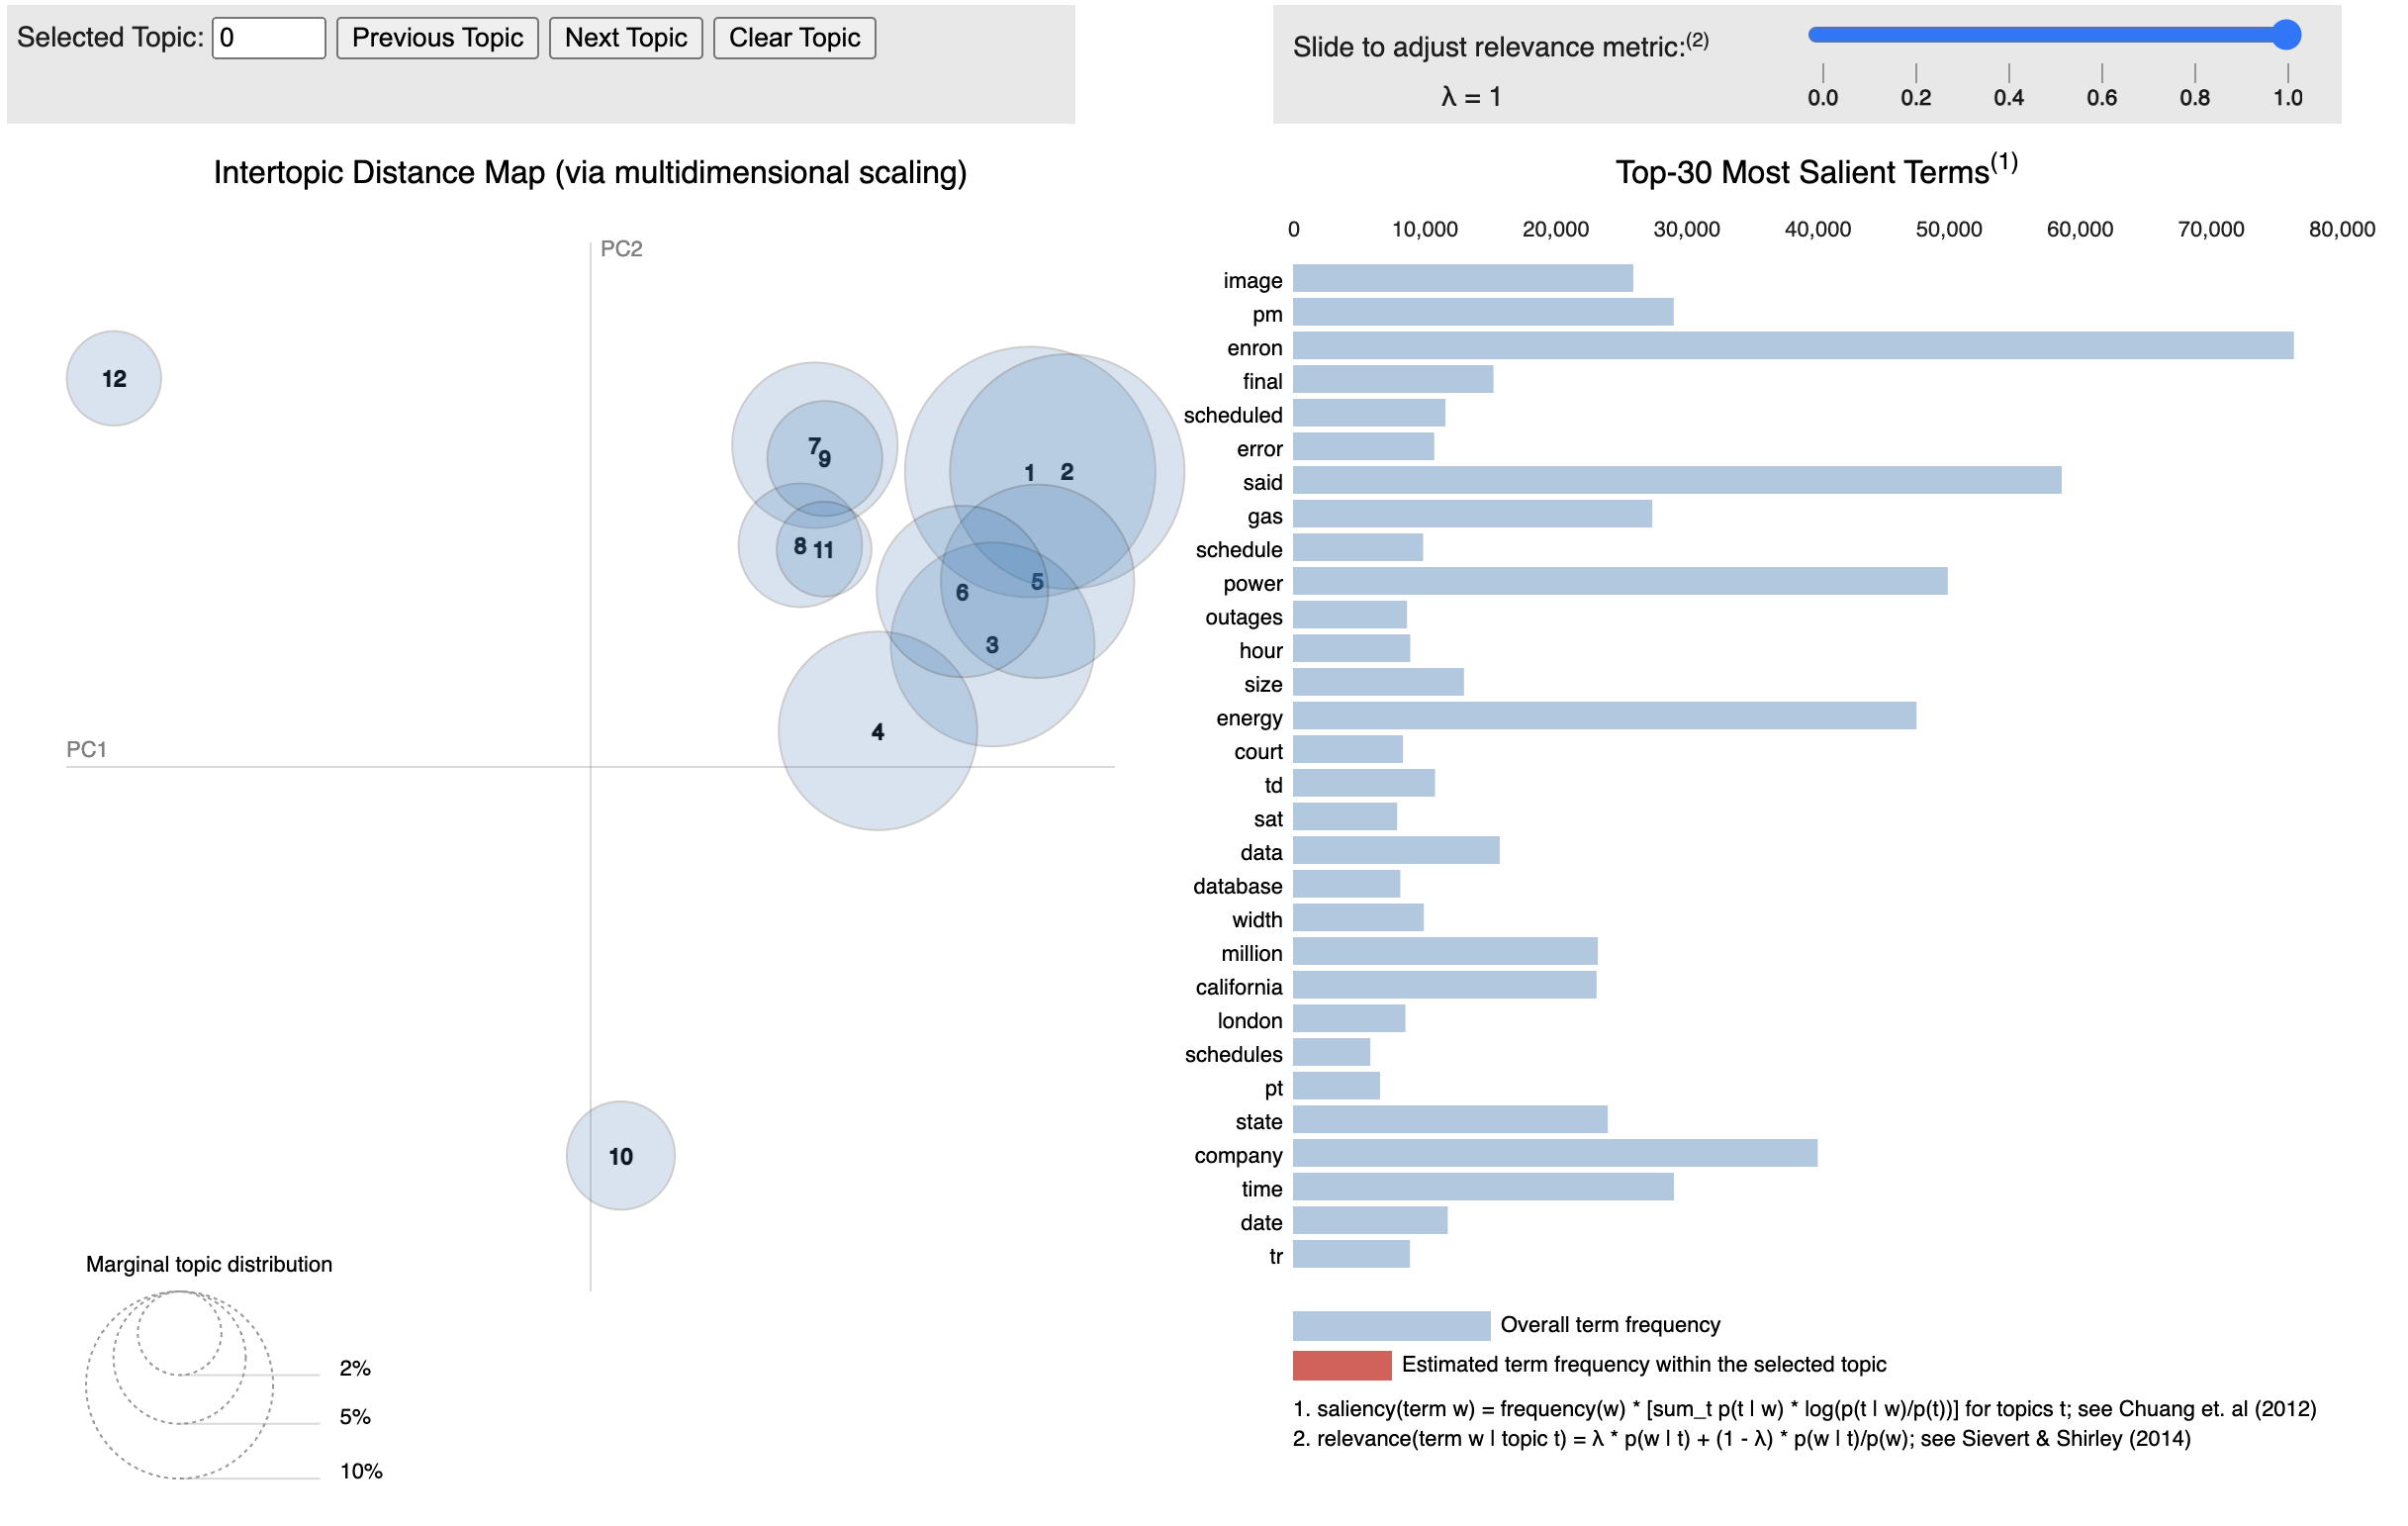

<h2 style="color:#003b7f">Email Summarization</h2>

Performing `email summarization` offers several advantages.

1. Firstly, Summarizing emails helps in managing information overload, especially in busy work environments, by providing concise and informative summaries of lengthy email threads.
2. Secondly, it enhances productivity by allowing users to quickly grasp the main points, key actions, or decisions within emails, enabling more efficient decision-making and task prioritization.
3. Lastly, email summarization can aid in organizing and archiving emails by providing a condensed overview, making it easier to search and retrieve relevant information when needed.

<span style="color:#f26419; font-size:18px"><i>Email Sampling</i></span>

Before performing any sampling on a dataset containing email data, it is essential to plot the distribution of email lengths to understand the range and spread of the data, ensuring that the sampling method captures the diversity of email lengths accurately.

In [23]:
df_process = pd.read_csv('emails_with_topics.csv')

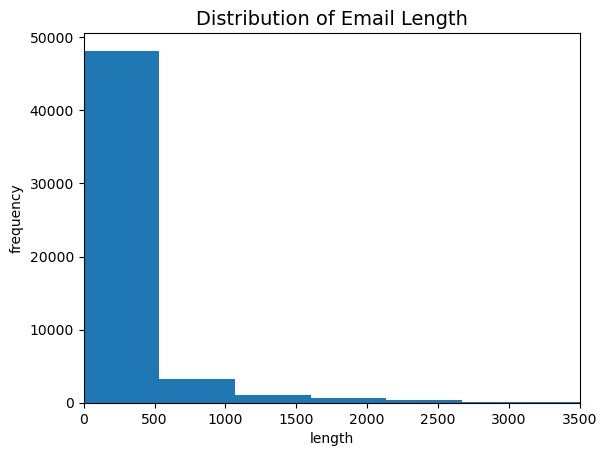

In [25]:
df_process['body_token_len'].hist(grid=False, bins=120)

plt.ylabel('frequency')
plt.xlabel('length')
plt.title('Distribution of Email Length', fontsize=14)
plt.xlim(0,3500);

Based on our distribution plot, we will create a filter criterion for selecting a subset of emails. In this case, we will be choosing emails with a length of less than or equal to 500 tokens for the following reasons:

1. Focus on Shorter Emails
2. Computational Efficiency
3. Proof of Concept

Additionally, we will randomly sample 100 emails from the filtered subset.

In [26]:
df_sample = df_process[df_process['body_token_len'] <= 500].sample(100, random_state=0).copy()
df_sample

,file,message,Date,Subject,X-From,X-To,X-Folder,body,body_token_len,body_text_processed,topics,top_topic,top_index,topic,topic_cluster
48723,taylor-m/inbox/social/65.,Message-ID: <5451262.1075862104056.JavaMail.ev...,"Thu, 9 Aug 2001 06:16:01 -0700 (PDT)",HAPPY HOUR FRIDAY,"Nichols, Natalie A </O=ENRON/OU=NA/CN=RECIPIEN...","Harvey, Claire </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\MTAYLOR5 (Non-Privileged)\Taylor, Michael E\I...","Hey, everyone! The consensus is that the anal...",94,hey everyone the consensus is that the analys...,"[(1, 0.031581003), (3, 0.60784084), (4, 0.1263...","(3, 0.60784084)",3,"0.009*""enron"" + 0.008*""know"" + 0.006*""meeting""...",General Discussions and Questions
32605,mclaughlin-e/inbox/100.,Message-ID: <12315670.1075841243189.JavaMail.e...,"Thu, 10 Jan 2002 14:30:52 -0800 (PST)",Curves,"Jones, Brad </O=ENRON/OU=NA/CN=RECIPIENTS/CN=B...","Keiser, Kam </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...","\ExMerge - McLaughlin Jr., Errol\Inbox","Kam,\nAttached is a list of all the curves I u...",27,kam\nattached is a list of all the curves i up...,"[(2, 0.082991205), (4, 0.8573688)]","(4, 0.8573688)",4,"0.011*""information"" + 0.007*""enron"" + 0.006*""c...",Information Access and Communication
51359,watson-k/inbox/285.,Message-ID: <32363123.1075852911237.JavaMail.e...,"Fri, 26 Oct 2001 07:45:49 -0700 (PDT)",Bullets,"Lindberg, Lorraine </O=ENRON/OU=NA/CN=RECIPIEN...","Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","\KWATSON (Non-Privileged)\Watson, Kimberly\Inbox",Calpine - Meet with Calpine to discuss Red Roc...,194,calpine meet with calpine to discuss red rock...,"[(3, 0.5789051), (4, 0.0692271), (9, 0.0620690...","(3, 0.5789051)",3,"0.009*""enron"" + 0.008*""know"" + 0.006*""meeting""...",General Discussions and Questions
52328,whalley-l/notes_inbox/525.,Message-ID: <23259498.1075858058151.JavaMail.e...,"Thu, 24 May 2001 08:52:00 -0700 (PDT)",(no subject),FGIFIRST@aol.com,greg.whalley@enron.com,\Lawrence_Whalley_Jun2001\Notes Folders\Notes ...,"Greg, \nI want to thank you for the time you t...",118,greg \ni want to thank you for the time you to...,"[(2, 0.106323555), (3, 0.62443346), (4, 0.2348...","(3, 0.62443346)",3,"0.009*""enron"" + 0.008*""know"" + 0.006*""meeting""...",General Discussions and Questions
50036,taylor-m/notes_inbox/696.,Message-ID: <27202108.1075859999774.JavaMail.e...,"Thu, 1 Jun 2000 10:27:00 -0700 (PDT)",Associate & Analyst Programs (Enron-wide email),Office of the Chairman,All Enron Worldwide,\Mark_Taylor _Dec_2000\Notes Folders\Notes inbox,Please click on the below link to access a mes...,17,please click on the below link to access a mes...,"[(0, 0.010420087), (1, 0.010420008), (2, 0.010...","(4, 0.8853729)",4,"0.011*""information"" + 0.007*""enron"" + 0.006*""c...",Information Access and Communication
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27017,lay-k/inbox/1862.,Message-ID: <19141469.1075862889559.JavaMail.e...,"Wed, 14 Nov 2001 22:18:31 -0800 (PST)",Message,"""sanjaybhatnagar00"" <sanjaybhatnagar00@yahoo.c...","Lay, Kenneth </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","\KLAY (Non-Privileged)\Lay, Kenneth\Inbox","\nDear Dr. Lay:\n\nToday was Diwali, the festi...",142,\ndear dr lay\n\ntoday was diwali the festival...,"[(0, 0.01955534), (2, 0.15590566), (3, 0.61495...","(3, 0.6149509)",3,"0.009*""enron"" + 0.008*""know"" + 0.006*""meeting""...",General Discussions and Questions
51215,ward-k/inbox/400.,Message-ID: <16676035.1075862959374.JavaMail.e...,"Thu, 15 Nov 2001 08:40:46 -0800 (PST)",Frito-Lay language - change to Item 6 of Speci...,"Williams, Jason R (Credit) </O=ENRON/OU=NA/CN=...","Dickson, Stacy E. </O=ENRON/OU=NA/CN=RECIPIENT...","\KWARD (Non-Privileged)\Ward, Kim S (Houston)\...",Stacy -\n\nWith respect to Item 6 of Frito-Lay...,53,stacy \n\nwith respect to item 6 of fritolays ...,"[(2, 0.30257472), (3, 0.37592885), (4, 0.29361...","(3, 0.37592885)",3,"0.009*""enron"" + 0.008*""know"" + 0.006*""meeting""...",General Discussions and Questions
40866,salisbur

<span style="color:#f26419; font-size:18px"><i>Text Summarization</i></span>

For this section, we will be comparing the Pegasus and BART models for text summarization to determine the most suitable model for our use case.

By comparing the capabilities of these models, we can assess their performance in terms of summary quality, coherence, and applicability to our specific use case, ultimately selecting the model that best meets our requirements for effective text summarization.

<h3 style="color:#003b7f">Text Summarization using Pegasus</h3>

Pegasus is a transformer-based model that excels in abstractive summarization, generating concise and coherent summaries by understanding the context and generating new sentences. It has been trained on large-scale datasets and is known for its performance on various summarization tasks [7].

Here, we set up the Pegasus model, specifically the "google/pegasus-xsum" variant, for text summarization. By initializing the Pegasus tokenizer and model, and defining a generate_summaries function, the code enables the generation of concise and coherent text summaries using the powerful capabilities of the Pegasus model.

In [28]:
from transformers import (AutoTokenizer, PegasusForConditionalGeneration,
                          PegasusTokenizer)

model_name = "google/pegasus-xsum"
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cuda"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)

def generate_cluster_summaries(model, clustered_docs, cluster_labels, 
                               max_length=100):
    """
    Function to generate text summaries per cluster using the
    summarization model
    """
    clusters = {}
    for doc, label in zip(clustered_docs, cluster_labels):
        clusters.setdefault(label, []).append(doc)
    
    cluster_summaries = []
    for cluster_label, docs in clusters.items():
        cluster_text = ["\n".join(docs)]
        
        if not cluster_text: 
            continue
        
        batch = tokenizer(cluster_text, truncation=True, 
                          padding="longest", return_tensors="pt").to(device)
        
        translated = model.generate(**batch, max_length=max_length)
        tgt_text = tokenizer.batch_decode(translated, 
                                          skip_special_tokens=True)
        
        cluster_summaries.append(tgt_text[0])

    return cluster_summaries

def generate_summaries(model, text, max_length=100):
    """
    Function to generate text summaries using the summarization model.
    """
    batch = tokenizer([text], truncation=True, padding="longest", 
                      return_tensors="pt").to(device)
    
    translated = model.generate(**batch, max_length=max_length)
    tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
    return tgt_text[0]

In [38]:
df_sample['summary'] = df_sample['body_text_processed'].apply(lambda x: 
                                                generate_summaries(model, x))

Here are some examples showcasing the application of the Pegasus model for email summarization. It demonstrates the generation of a summary for an email, highlighting the effectiveness of the Pegasus model in condensing and capturing the key information from the email content.

<span style="color:#f26419; font-size:18px"><i>Example 1</i></span>

In [7]:
ilocation = 0
print('Orginal Email:')
print(df_sample['body_text_processed'].iloc[ilocation])
print('\n')
print('\n')
print('Summarized Email:')
print(df_sample['summary'].iloc[ilocation])

Orginal Email:
hey everyone  the consensus is that the analyst happy hour for this week should be at sherlocks on west gray  it is located in the river oaks shopping area between waugh and shepherd on the south side of west gray above birra porettis restaurant  its only about 225 miles from work  there is pool dart boards and free food  i imagine people will start trickling in from work around 530 or 6  see you there  
natalie

  the black box is sherlocks

please forward to anyone who might have not received this





embedded picture metafile




Summarized Email:
analyst happy hour for this week should be at sherlocks on west gray it is located on the south side of west gray above birra porettis restaurant its only about 225 miles from work


<span style="color:#f26419; font-size:18px"><i>Example 2</i></span>

In [9]:
ilocation = 24
print('Orginal Email:')
print(df_sample['body_text_processed'].iloc[ilocation])
print('\n')
print('\n')
print('Summarized Email:')
print(df_sample['summary'].iloc[ilocation])

Orginal Email:
attached is the final draft of the cftc comment letter regarding
implementation of the commodity futures modernization act

 cftc  cfma comment letter finaldoc

stacy carey
director north american regulatory policy
international swaps and derivatives association
600 5th avenue 27th floor
rockefeller center
new york ny  10020
212 3321202 ph
212 3321212 fax
917 5439622 cell
scareyisdaorg



  cftc  cfma comment letter finaldoc




Summarized Email:
The Commodity Futures Trading Commission (CFTC) has published the final draft of its comment letter on the commodity futures modernization act.


<span style="color:#f26419; font-size:18px"><i>Example 3</i></span>

In [8]:
ilocation = 12
print('Orginal Email:')
print(df_sample['body_text_processed'].iloc[ilocation])
print('\n')
print('\n')
print('Summarized Email:')
print(df_sample['summary'].iloc[ilocation])

Orginal Email:

ken

i wanted to let you know that i spoke with wo king at the baker institute earlier today  everything is ready for tomorrows activities

there will be a great deal of media coverage for the event  many media outlets will be accessing the live video feed of chairman greenspans speech  however the media will not be able to interview any participants directly  chairman greenspan will only answer written questions submitted by the audience including media and those questions will be vetted twice  i will be receiving the media advisory that has been distributed and the most current media attendee list from the baker institute tomorrow  i will provide that to you as early as possible 

you probably know that because of his position chairman greenspan can not accept the prize itself but only the honor of being named an enron prize recipient  for that reason the enron prize will not be present on stage during the ceremony  

karen denne christie patrick and i will be attendi

<span style="color:#f26419; font-size:18px"><i>Topic-based Email Grouping and Individual Summaries</i></span>

We integrate the outputs of topic modeling and text summarization to build an email summarizer. This powerful combination allows us to efficiently analyze large volumes of text data, providing valuable insights and extracting meaningful information. By automating the categorization of topics and generating concise summaries, office workers can save time and effort in processing lengthy documents, emails, or reports. This enhances their productivity, efficiency, and enables them to make well-informed decisions, while also freeing up their time to focus on other essential tasks in the workplace.

In [39]:
for i in range(num_topics):
    print(f'Topic: {topic_map[i]}')
    temp = df_sample[df_sample['top_index']==i]
    display(temp[['body_text_processed', 'summary']].head())
    print(f'\n')

Topic: Power Outages


,body_text_processed,summary
24999,test\n\nsent from my blackberry wireless handh...,Testimonials from BBC Radio 4's Today programm...
51110,\nesource presents lexisnexis training\n\nbasi...,The following is a list of current and upcomin...
38906,\n\nthis is a notice to inform you that the se...,"Blackberry users, you may have noticed that yo..."




Topic: Travel and Fares


,body_text_processed,summary
14012,image\n\nregister now before it sells out\nyo...,This year's atlanta ldc forum will be the larg...
13427,enron opens an office in japan get the detail...,A look at some of the key stories in the lates...




Topic: Enron and Financial Matters


,body_text_processed,summary
35104,please mark your calendars emory ireland and...,"There will be a special event in Houston, Texa..."
3105,the attached memo contains an enron industrial...,An internal memo from enron has been obtained ...
42875,sara\ni was just following up on what the stat...,A question from a member of the public to the ...
22389,we have received an executed termination agree...,The following is a statement from the French e...
21898,does anyone have the blue file for chase manha...,Does anyone have a blue file for chase manhatt...




Topic: General Discussions and Questions


,body_text_processed,summary
48723,hey everyone the consensus is that the analys...,Analyst happy hour for this week is at sherloc...
51359,calpine meet with calpine to discuss red rock...,Calpine and socal are continuing to discuss th...
52328,greg \ni want to thank you for the time you to...,The following is a letter from the chief execu...
40952,in an effort to support our fellow citizens du...,New York City Mayor Bill de Blasio and members...
40973,hello guys\n\n here is the detail for the an...,Here is the detail for the annuities for ancil...




Topic: Information Access and Communication


,body_text_processed,summary
32605,kam\nattached is a list of all the curves i up...,This is a list of all the curves i upload all...
50036,please click on the below link to access a mes...,"The chairman of the European Commission, Jean-..."
40103,dear power outage database customer\n\nattache...,The following email has been sent to a custome...
10366,\n\nthis exclusive offer has been sent to you ...,If you are a subscriber to thestreetcom or www...
46664,\nesources weekly liquefied natural gas lng ne...,This is the latest edition of our weekly newsl...




Topic: Database and Technical Errors


,body_text_processed,summary
6525,the payment status has changed on the followin...,The payment status of the following expenses h...




Topic: Miscellaneous Updates and Information


,body_text_processed,summary
46079,\nhttpwwweyeforenergycomnewsletternewsletter_1...,Images courtesy of WWweyeforenergy.com.




Topic: Schedules and Variances


,body_text_processed,summary
29458,start date 4501 hourahead hour 4 no ancillary...,start date 4501 hourahead hour 4 no ancillary...
29271,start date 42901 hourahead hour 13 hourahead ...,Hourahead has released a new schedule for its ...
20682,\n\nthe following latepending nom has been rej...,This document was created by tco0060 in the db...




Topic: Company News and Partnerships


,body_text_processed,summary
4991,cgoeringnyisocom writes to the nyiso_tech_exch...,New York Stock Exchange (Nyiso) announces that...
51614,\n\ndo you yahoo\nget email alerts new webcam...,New webcam video instant messaging with yahoo ...




Topic: Image Processing and Energy Markets


,body_text_processed,summary
50561,\nimage 09\nclick click click 09\n\n\n image ...,If you are looking for a business to buy your ...
15860,yahoo newsedit breaking news alerts yahoo\n\n...,Sign up for breaking news alerts from Yahoo News.




Topic: Enron and Power/Energy


,body_text_processed,summary
12412,im attaching a copy of azurixs request for arb...,A request for arbitration with icsid in washin...
40296,enjoy\n 20011027ercot_loadxls \n 20011027erc...,A look back at some of the most eye-catching s...
26818,\ni have been an enron stockholder for several...,The following is a letter from an enron stockh...




Topic: Power and Energy Markets


,body_text_processed,summary
40274,\n\nsell hour ending 6 only 30 mws for fronter...,There will be only 30 mws for frontera tomorro...
28863,our upstream is sempra our downstream is miran...,This is the schedule for the Cairngorms in the...
8525,stevelara this is the senate bill we discusse...,"Stevelara, a member of the US House of Represe..."
11098,a pdf version of the original letter is attach...,A letter from the United States General Accoun...
10413,wilson please see below it looks like in ca a...,The California Public Utilities Commission (Pu...


<span style="color:#f26419; font-size:18px"><i>Topic-driven Email Summarization</i></span>

To leverage the capabilities of both LDA and the text summarizer, we can create a single output that summarizes emails within the same topic. Here's how we can achieve this:

1. **`LDA Topic Modeling:`** Using the LDA model trained on the Enron Email Dataset, we can assign each email to one or more topics based on their content. The LDA model assigns a probability distribution of topics to each email, indicating the degree of relevance of each topic to that particular email.

2. **`Topic-Based Grouping:`** We can group the emails based on their assigned topics. This allows us to gather all the emails that are associated with a particular topic together.

3. **`Text Summarization:`** Within each topic group, we can apply the text summarization technique to generate a concise summary of the emails. The text summarizer extracts the key information and main points from the emails, condensing the content into a shorter, coherent summary.

4. **`Output Generation:`** Finally, we can combine the topic label and the corresponding summary for each topic to create a single output. This output provides a summary of emails within the same topic, enabling users to quickly grasp the main content and key points of the discussions or information exchange related to that topic.

In [33]:
df_topics = (df_sample.groupby(['topic_cluster'])['body_text_processed']
                      .apply(lambda x: ' '.join(x)).reset_index())

df_topics['summary'] = df_topics['body_text_processed'].apply(lambda x: 
                                                generate_summaries(model, x))
df_topics

,topic_cluster,body_text_processed,summary
0,Company News and Partnerships,cgoeringnyisocom writes to the nyiso_tech_exch...,The New York Stock Exchange (Nyiso) is plannin...
1,Database and Technical Errors,the payment status has changed on the followin...,The payment status of the following expenses h...
2,Enron and Financial Matters,please mark your calendars emory ireland and...,The following is a list of items that have bee...
3,Enron and Power/Energy,im attaching a copy of azurixs request for arb...,I am writing to enron stockholders to ask them...
4,General Discussions and Questions,hey everyone the consensus is that the analys...,The analyst happy hour for this week should be...
5,Image Processing and Energy Markets,\nimage 09\nclick click click 09\n\n\n image ...,If you are looking for a business to buy your ...
6,Information Access and Communication,kam\nattached is a list of all the curves i up...,This email has been sent to you by thestreetco...
7,Miscellaneous Updates and Information,\nhttpwwweyeforenergycomnewsletternewsletter_1...,Images courtesy of WWweyeforenergy.com.
8,Power Outages,test\n\nsent from my blackberry wireless handh...,This is an e-mail message sent from my blackbe...
9,Power and Energy Markets,\n\nsell hour ending 6 only 30 mws for fronter...,The following is an edited version of a letter...


<h3 style="color:#003b7f">Text Summarization using BART</h3>

BART (Bidirectional and Auto-Regressive Transformer) is another transformer-based model that combines the strengths of auto-regressive and denoising techniques. It can perform both abstractive and extractive summarization and has been trained on a diverse range of tasks, including summarization [8].

We now introduce the BART model, specifically the `facebook/bart-large-xsum` variant, for text summarization.

In [30]:
from transformers import (AutoTokenizer, PegasusForConditionalGeneration,
                          PegasusTokenizer)
from transformers import BartForConditionalGeneration 

model_name = "facebook/bart-large-xsum"
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cuda"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name).to(device)

In [36]:
df_sample['summary_bart'] = df_sample['body_text_processed'].apply(lambda x: 
                                                generate_summaries(model, x))

Using the same original email, here is an example demonstrating the utilization of the BART model for email summarization. It showcases the generation of a summary for an email, emphasizing the efficacy of the BART model in producing concise and informative summaries by capturing the essential details from the email text.

<span style="color:#f26419; font-size:18px"><i>Example 1</i></span>

In [12]:
ilocation = 0
print('Orginal Email:')
print(df_sample['body_text_processed'].iloc[ilocation])
print('\n')
print('\n')
print('Summarized Email:')
print(df_sample['summary_bart'].iloc[ilocation])

Orginal Email:
hey everyone  the consensus is that the analyst happy hour for this week should be at sherlocks on west gray  it is located in the river oaks shopping area between waugh and shepherd on the south side of west gray above birra porettis restaurant  its only about 225 miles from work  there is pool dart boards and free food  i imagine people will start trickling in from work around 530 or 6  see you there  
natalie

  the black box is sherlocks

please forward to anyone who might have not received this





embedded picture metafile




Summarized Email:
Analyst happy hour for this week is at sherlocks on west gray.


<span style="color:#f26419; font-size:18px"><i>Example 2</i></span>

In [13]:
ilocation = 24
print('Orginal Email:')
print(df_sample['body_text_processed'].iloc[ilocation])
print('\n')
print('\n')
print('Summarized Email:')
print(df_sample['summary_bart'].iloc[ilocation])

Orginal Email:
attached is the final draft of the cftc comment letter regarding
implementation of the commodity futures modernization act

 cftc  cfma comment letter finaldoc

stacy carey
director north american regulatory policy
international swaps and derivatives association
600 5th avenue 27th floor
rockefeller center
new york ny  10020
212 3321202 ph
212 3321212 fax
917 5439622 cell
scareyisdaorg



  cftc  cfma comment letter finaldoc




Summarized Email:
The Commodity Futures Trading Commission (Cftc) has invited comments on its proposed commodity futures modernization act.


<span style="color:#f26419; font-size:18px"><i>Example 3</i></span>

In [14]:
ilocation = 12
print('Orginal Email:')
print(df_sample['body_text_processed'].iloc[ilocation])
print('\n')
print('\n')
print('Summarized Email:')
print(df_sample['summary_bart'].iloc[ilocation])

Orginal Email:

ken

i wanted to let you know that i spoke with wo king at the baker institute earlier today  everything is ready for tomorrows activities

there will be a great deal of media coverage for the event  many media outlets will be accessing the live video feed of chairman greenspans speech  however the media will not be able to interview any participants directly  chairman greenspan will only answer written questions submitted by the audience including media and those questions will be vetted twice  i will be receiving the media advisory that has been distributed and the most current media attendee list from the baker institute tomorrow  i will provide that to you as early as possible 

you probably know that because of his position chairman greenspan can not accept the prize itself but only the honor of being named an enron prize recipient  for that reason the enron prize will not be present on stage during the ceremony  

karen denne christie patrick and i will be attendi

<span style="color:#f26419; font-size:18px"><i>Topic-based Email Grouping and Individual Summaries</i></span>

Once again, we merge the outcomes of topic modeling and email summarization, but this time leveraging the results from the BART model.

In [37]:
for i in range(num_topics):
    print(f'Topic: {topic_map[i]}')
    temp = df_sample[df_sample['top_index']==i]
    display(temp[['body_text_processed', 'summary_bart']].head())
    print(f'\n')

Topic: Power Outages


,body_text_processed,summary_bart
24999,test\n\nsent from my blackberry wireless handh...,Testimonials from BBC Radio 4's Today programm...
51110,\nesource presents lexisnexis training\n\nbasi...,The following is a list of current and upcomin...
38906,\n\nthis is a notice to inform you that the se...,"Blackberry users, you may have noticed that yo..."




Topic: Travel and Fares


,body_text_processed,summary_bart
14012,image\n\nregister now before it sells out\nyo...,This year's atlanta ldc forum will be the larg...
13427,enron opens an office in japan get the detail...,A look at some of the key stories in the lates...




Topic: Enron and Financial Matters


,body_text_processed,summary_bart
35104,please mark your calendars emory ireland and...,"There will be a special event in Houston, Texa..."
3105,the attached memo contains an enron industrial...,An internal memo from enron has been obtained ...
42875,sara\ni was just following up on what the stat...,A question from a member of the public to the ...
22389,we have received an executed termination agree...,The following is a statement from the French e...
21898,does anyone have the blue file for chase manha...,Does anyone have a blue file for chase manhatt...




Topic: General Discussions and Questions


,body_text_processed,summary_bart
48723,hey everyone the consensus is that the analys...,Analyst happy hour for this week is at sherloc...
51359,calpine meet with calpine to discuss red rock...,Calpine and socal are continuing to discuss th...
52328,greg \ni want to thank you for the time you to...,The following is a letter from the chief execu...
40952,in an effort to support our fellow citizens du...,New York City Mayor Bill de Blasio and members...
40973,hello guys\n\n here is the detail for the an...,Here is the detail for the annuities for ancil...




Topic: Information Access and Communication


,body_text_processed,summary_bart
32605,kam\nattached is a list of all the curves i up...,This is a list of all the curves i upload all...
50036,please click on the below link to access a mes...,"The chairman of the European Commission, Jean-..."
40103,dear power outage database customer\n\nattache...,The following email has been sent to a custome...
10366,\n\nthis exclusive offer has been sent to you ...,If you are a subscriber to thestreetcom or www...
46664,\nesources weekly liquefied natural gas lng ne...,This is the latest edition of our weekly newsl...




Topic: Database and Technical Errors


,body_text_processed,summary_bart
6525,the payment status has changed on the followin...,The payment status of the following expenses h...




Topic: Miscellaneous Updates and Information


,body_text_processed,summary_bart
46079,\nhttpwwweyeforenergycomnewsletternewsletter_1...,Images courtesy of WWweyeforenergy.com.




Topic: Schedules and Variances


,body_text_processed,summary_bart
29458,start date 4501 hourahead hour 4 no ancillary...,start date 4501 hourahead hour 4 no ancillary...
29271,start date 42901 hourahead hour 13 hourahead ...,Hourahead has released a new schedule for its ...
20682,\n\nthe following latepending nom has been rej...,This document was created by tco0060 in the db...




Topic: Company News and Partnerships


,body_text_processed,summary_bart
4991,cgoeringnyisocom writes to the nyiso_tech_exch...,New York Stock Exchange (Nyiso) announces that...
51614,\n\ndo you yahoo\nget email alerts new webcam...,New webcam video instant messaging with yahoo ...




Topic: Image Processing and Energy Markets


,body_text_processed,summary_bart
50561,\nimage 09\nclick click click 09\n\n\n image ...,If you are looking for a business to buy your ...
15860,yahoo newsedit breaking news alerts yahoo\n\n...,Sign up for breaking news alerts from Yahoo News.




Topic: Enron and Power/Energy


,body_text_processed,summary_bart
12412,im attaching a copy of azurixs request for arb...,A request for arbitration with icsid in washin...
40296,enjoy\n 20011027ercot_loadxls \n 20011027erc...,A look back at some of the most eye-catching s...
26818,\ni have been an enron stockholder for several...,The following is a letter from an enron stockh...




Topic: Power and Energy Markets


,body_text_processed,summary_bart
40274,\n\nsell hour ending 6 only 30 mws for fronter...,There will be only 30 mws for frontera tomorro...
28863,our upstream is sempra our downstream is miran...,This is the schedule for the Cairngorms in the...
8525,stevelara this is the senate bill we discusse...,"Stevelara, a member of the US House of Represe..."
11098,a pdf version of the original letter is attach...,A letter from the United States General Accoun...
10413,wilson please see below it looks like in ca a...,The California Public Utilities Commission (Pu...


<span style="color:#f26419; font-size:18px"><i>Topic-driven Email Summarization</i></span>

Again, to leverage the capabilities of both LDA and the text summarizer, we create a single output that summarizes emails within the same topic. 

In [34]:
df_topics['summary_bart'] = df_topics['body_text_processed'].apply(lambda x: 
                                                generate_summaries(model, x))
df_topics

,topic_cluster,body_text_processed,summary,summary_bart
0,Company News and Partnerships,cgoeringnyisocom writes to the nyiso_tech_exch...,The New York Stock Exchange (Nyiso) is plannin...,The New York Stock Exchange (Nyiso) is plannin...
1,Database and Technical Errors,the payment status has changed on the followin...,The payment status of the following expenses h...,The payment status of the following expenses h...
2,Enron and Financial Matters,please mark your calendars emory ireland and...,The following is a list of items that have bee...,The following is a list of items that have bee...
3,Enron and Power/Energy,im attaching a copy of azurixs request for arb...,I am writing to enron stockholders to ask them...,I am writing to enron stockholders to ask them...
4,General Discussions and Questions,hey everyone the consensus is that the analys...,The analyst happy hour for this week should be...,The analyst happy hour for this week should be...
5,Image Processing and Energy Markets,\nimage 09\nclick click click 09\n\n\n image ...,If you are looking for a business to buy your ...,If you are looking for a business to buy your ...
6,Information Access and Communication,kam\nattached is a list of all the curves i up...,This email has been sent to you by thestreetco...,This email has been sent to you by thestreetco...
7,Miscellaneous Updates and Information,\nhttpwwweyeforenergycomnewsletternewsletter_1...,Images courtesy of WWweyeforenergy.com.,Images courtesy of WWweyeforenergy.com.
8,Power Outages,test\n\nsent from my blackberry wireless handh...,This is an e-mail message sent from my blackbe...,This is an e-mail message sent from my blackbe...
9,Power and Energy Markets,\n\nsell hour ending 6 only 30 mws for fronter...,The following is an edited version of a letter...,The following is an edited version of a letter...


<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">IX. Results & Discussions</h1>

<span style="color:#f26419; font-size:18px"><i>Example 1</i></span>

**`Orginal Email`**

Hey everyone, the consensus is that the analyst happy hour for this week should be at Sherlocks on West Gray. It is located in the River Oaks shopping area between Waugh and Shepherd on the south side of West Gray above Birra Porettis Restaurant. It's only about 225 miles from work. There is pool, dart, boards, and free food. I imagine people will start trickling in from work around 530 or 6. See you there!

Natalie

  The black box is sherlocks

Please forward to anyone who might have not received this

embedded picture metafile

------------------------------------

**`Summarized Email by Pegasus`**

analyst happy hour for this week should be at sherlocks on west gray it is located on the south side of west gray above birra porettis restaurant its only about 225 miles from work

------------------------------------

**`Summarized Email by BART`**

Analyst happy hour for this week is at sherlocks on west gray.

------------------------------------

**`Discussion`**

In the comparison of summaries generated by BART and Pegasus, both models produced desirable summaries that effectively captured the content of the email. However, BART's summary was more concise, using fewer words to convey the essence of the email. This concise nature makes BART's summary more desirable and easily digestible as a summary.

<span style="color:#f26419; font-size:18px"><i>Example 2</i></span>

**`Orginal Email`**

Attached is the final draft of the cftc comment letter regarding implementation of the Commodity Futures Modernization Act.

 cftc  cfma comment letter finaldoc

Attached is the final draft of the cftc comment letter regarding implementation of the Commodity Futures Modernization Act.

 cftc cfma comment letter finaldoc

Stacy Carey \
Director North American Regulatory Policy \
International Swaps and Derivatives Association \
600 5th Avenue, 27th floor, \
Rockefeller Center, \
New York, NY, 10020

cftc cfma comment letter finaldoc

212 3321202 ph \
212 3321212 fax \
917 5439622 cell \
scareyisdaorg



  cftc  cfma comment letter finaldoc

------------------------------------

**`Summarized Email by Pegasus`**

The Commodity Futures Trading Commission (CFTC) has published the final draft of its comment letter on the commodity futures modernization act.

------------------------------------

**`Summarized Email by BART`**

The Commodity Futures Trading Commission (Cftc) has invited comments on its proposed commodity futures modernization act.

------------------------------------

**`Discussion`**

In the comparison of summaries generated by PEGASUS and BART, it is evident in this example that PEGASUS more accurately captured the content of the email with its summary. On the other hand, BART's interpretation focused on the invitation for comments, likely due to the presence of a comment letter attachment in the email.

<span style="color:#f26419; font-size:18px"><i>Example 3</i></span>

**`Orginal Email`**

Ken,

I wanted to let you know that i spoke with wo king at the Baker Institute Earlier Today. Everything is ready for tomorrow's activities.

There will be a great deal of media coverage for the event. Many media outlets will be accessing the live video feed of chairman Greenspan's speech. However, the media will not be able to interview any participants directly. Chairman Greenspan will only answer written questions submitted by the audience including media and those questions will be vetted twice. I will be receiving the media advisory that has been distributed and the most current media attendee list from the Baker Institute tomorrow. I will provide that to you as early as possible.

You probably know that because of his position, chairman Greenspan can not accept the prize itself but only the honor of being named an Enron prize recipient. For that reason the enron prize will not be present on stage during the ceremony.

Karen, Denne, Christie, Patrick, and I will be attending. Please let me know if you have any questions or need additional information prior to the event.

See you there, \
Terrie

------------------------------------

**`Summarized Email by Pegasus`**

The enron prize will be given out at a ceremony at the baker institute on Thursday and we want to provide you with some information about what to expect.

------------------------------------

**`Summarized Email by BART`**

The enron prize will be presented to chairman greenspan at a ceremony at the baker institute in Londonderry later.

------------------------------------

**`Discussion`**

Both Pegasus and BART demonstrated effective summarization by capturing the key details of the email, which indicated an upcoming awarding ceremony for the Enron prize at the Baker Institute. However, there were slight differences in their summaries. Pegasus mentioned "Thursday," which might not align with the intended meaning, while BART used the term "later" instead of specifying "tomorrow."

Although these minor discrepancies can be addressed with some fine-tuning, both Pegasus and BART successfully conveyed the main message of the email, highlighting the upcoming award ceremony.

<span style="color:#f26419; font-size:18px"><i>Overall Consensus</i></span>

In terms of quality, we find the results obtained from the BART model and Pegasus model to be highly satisfactory. Both the BART model and the Pegasus Model demonstrated strong performances in generating accurate and coherent summaries, effectively capturing the essence of the original text. Their ability to produce high-quality summaries contributes to enhanced comprehension and information extraction, providing users with valuable insights while minimizing the need to read through lengthy documents or emails.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">X. Conclusion</h1>

In conclusion, our solution successfully addressed the challenges associated with managing and extracting relevant information from a flood of emails using natural language processing techniques. By leveraging topic modeling and text summarization, we were able to streamline the perusal of unread emails and enhance productivity.

The Enron Email Dataset proved to be a valuable resource, providing a large collection of emails and related documents that facilitated our research and analysis. With approximately 500,000 data points, we had a rich and diverse dataset to work with, allowing us to gain insights into communication patterns, topics of discussion, and trends within the Enron Corporation.

Through data preprocessing, cleaning, and filtering, we refined the dataset to focus on the most relevant emails for our specific use case. By applying exclusion criteria and prioritizing original messages received directly in the 'Inbox' folder, we reduced noise and ensured the inclusion of primary content for analysis.

The combination of LDA (Latent Dirichlet Allocation) and text summarization techniques played a crucial role in our solution implementation. LDA allowed us to identify email topics and group related messages together, enabling efficient navigation and exploration of specific themes. Text summarization further enhanced the analysis by generating concise summaries of emails within each topic, providing a high-level overview and key insights from the discussions.

We compared the performance of different summarization models, such as Pegasus and BART, and observed their strengths and limitations. While both models were able to generate desirable summaries, slight variations in the wording and interpretation were observed. Fine-tuning and parameter adjustments could further enhance the accuracy and alignment of the summaries with the original content.

Overall, our solution demonstrated the effectiveness of natural language processing techniques in extracting meaningful information from large email datasets. By automating topic identification and email summarization, we enabled users to efficiently navigate through emails, make informed decisions, and overcome information overload.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">XI. Recommendations</h1>

<span style="color:#f26419; font-size:18px"><i>Project Improvements</i></span>

**Advanced NLP Techniques**

- Explore advanced techniques like deep learning models (e.g., Transformer-based architectures) to enhance topic modeling and summarization accuracy.

**Real-Time Email Analysis**

- Develop a real-time analysis feature to provide immediate alerts and prioritization recommendations, improving email management efficiency.

**Integration with Productivity Tools**

- Integrate the system with popular productivity tools to synchronize email priorities, enabling cohesive workflow and task management.

</br>

<span style="color:#f26419; font-size:18px"><i>Future Extensions</i></span>

**Establish an efficient email urgency system**

- Capture temporal cues and meticulously arrange time-related tokens based on their urgency levels  to enhance email management efficiency.

**Customization and Personalization**

- Enable users to customize the email urgency system by adjusting urgency thresholds, tailoring it to individual preferences.

**Multimodal Analysis**

- Incorporate visual and audio data analysis from attachments or voice recordings to improve topic modeling accuracy and enhance email understanding.

</br>

<span style="color:#f26419; font-size:18px"><i>Users and Stakeholders</i></span>

**Partnerships with Email Service Providers**

- Collaborate with email service providers to integrate the email summarizer within their platforms, offering users more accurate and insightful email analysis.

**User Studies and Usability Testing**

- Conduct user studies and usability tests to gather feedback, ensuring the email summarizer meets user expectations and provides a seamless experience.

**Impact Assessment and Case Studies**

- Measure the impact of email summarization on productivity through assessments and case studies, showcasing its tangible benefits to stakeholders.


<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">XII. References</h1>

[1] Robinson D. (2022, May 20). LDA Topic Model Instability [Blog post]. Towards Data Science. Retrieved June 10, 2023, from [URL](https://towardsdatascience.com/lda-topic-model-instability-c2fedb77d249).

[2] Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022. [URL](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf).

[3] Dubey P. (2018, December 23). Understand Text Summarization and create your own summarizer in python. Towards Data Science. [URL](https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70).

[4] Gensim. (2022, December 21). Gensim. Retrieved June 02, 2023, from [URL](https://radimrehurek.com/gensim/intro.html).

[5] Milvus. (2023, June 07). Similarity Metrics. Milvus. Retrieved June 15, 2023, from [URL](https://milvus.io/docs/metric.md#Jaccard-distance).

[6] Shashank C. (2019, August 19). Evaluate Topic Models: Latent Dirichlet Allocation (LDA) [Blog post]. Towards Data Science. Retrieved June 10, 2023, from [URL](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0).

[7] Vrtaric, I. (2022, May 15). Notes on Abstractive Summarization: PegasusXSUM and T5 [Blog post]. Medium. Retrieved June 08, 2023, from [URL](https://medium.com/artificialis/notes-on-abstractive-summarization-pegasusxsum-and-t5-497109d72029).

[8] Raval P. (2023, April 24). Transformers BART Model Explained for Text Summarization [Blog post]. Project Pro. Retrieved June 08, 2023, from [URL](https://www.projectpro.io/article/transformers-bart-model-explained/553).